In [1]:
# 1. 그래프 plotly로 바꾸기
# 2. 고객분류니까 비지도 학습 한 번 해보고 실루엣계수, 실루엣그래프 그려보기
# 3. readme 예쁘게 작성, 깃꾸하기
# 4. stremlit으로 만들기
# 5. 22일 저녁 7시까지 끝내기

In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [3]:
# 한글깨짐 방지
#plt.rc('font', family='AppleGothic')

In [4]:
# 데이터 불러오기
df = pd.read_csv('shopping_behavior_updated.csv')
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [5]:
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [6]:
df['Previous Purchases'].unique()

array([14,  2, 23, 49, 31, 19,  8,  4, 26, 10, 37, 34, 44, 36, 17, 46, 50,
       22, 32, 40, 16, 13,  7, 41, 45, 38, 48, 18, 15, 25, 39, 35, 29, 21,
       43,  3,  5, 24, 42, 47, 28, 20, 33,  1,  9, 12, 27, 11, 30,  6])

In [7]:
df[df['Previous Purchases'] == 50]

Customer ID  Age  Gender Item Purchased     Category  \
20             21   21    Male          Pants     Clothing   
78             79   50    Male          Skirt     Clothing   
101           102   27    Male           Coat    Outerwear   
124           125   44    Male        Sweater     Clothing   
140           141   63    Male          Shirt     Clothing   
...           ...  ...     ...            ...          ...   
3581         3582   26  Female          Dress     Clothing   
3619         3620   44  Female          Scarf  Accessories   
3638         3639   40  Female       Backpack  Accessories   
3729         3730   28  Female          Boots     Footwear   
3742         3743   56  Female          Shirt     Clothing   

      Purchase Amount (USD)        Location Size    Color  Season  \
20                       51       Louisiana    M    Black  Winter   
78                       91        Nebraska    M   Maroon  Spring   
101                      85    North Dakota   XL    White  Spring   
124                      86          Nevada    M     Gray  Spring   
140                      28  North Carolina    L   Yellow    Fall   
...                     ...             ...  ...      ...     ...   
3581                     95         Georgia    M   Orange    Fall   
3619                     75  North Carolina    S  Magenta  Winter   
3638                     20          Kansas    M    Olive  Spring   
3729                     82    Rhode Island    M     Teal  Spring   
3742                     80        Maryland    M     Gray    Fall   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
20              2.8                 Yes         Express              Yes   
78              4.7                 Yes   Free Shipping              Yes   
101             4.6                 Yes         Express              Yes   
124             3.1                 Yes    Next Day Air              Yes   
140             3.9                 Yes  2-Day Shipping              Yes   
...             ...                 ...             ...              ...   
3581            4.9                  No    Next Day Air               No   
3619            4.9                  No  2-Day Shipping               No   
3638            4.6                  No         Express               No   
3729            4.7                  No  2-Day Shipping               No   
3742            4.4                  No        Standard               No   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
20               Yes                  50           Cash         Every 3 Months  
78               Yes                  50          Venmo            Fortnightly  
101              Yes                  50    Credit Card              Bi-Weekly  
124              Yes                  50         PayPal               Annually  
140              Yes                  50    Credit Card                 Weekly  
...              ...                 ...            ...                    ...  
3581              No                  50    Credit Card                 Weekly  
3619              No                  50          Venmo                 Weekly  
3638              No                  50         PayPal              Bi-Weekly  
3729              No                  50           Cash              Quarterly  
3742              No                  50    Credit Card              Bi-Weekly  

[77 rows x 18 columns]

In [8]:
# 'Weekly' : 주 1회

# 'Fortnightly' : 2주에 1번
# 'Bi-Weekly' : 2주에 1번

# 'Monthly' : 월에 1회

# 'Every 3 Months' : 3개월에 1번 -> 연 4회
# 'Quarterly' : 분기 1회 -> 연 4회

# 'Annually' : 연 1회

In [9]:
# 나이
# 성별
# 구입 상품
# 상품 카테고리
# 금액
# 위치 
# 사이즈
# 컬러
# 시즌
# 리뷰점수
# 구독여부
# 배송타입
# 할인적용 여부
# 프로모션코드 사용여부
# 지불 방법
# 구매빈도

In [10]:
# 데이터 기본정보 확인, null값 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [11]:
# 데이터 기본정보 확인
df.describe()

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

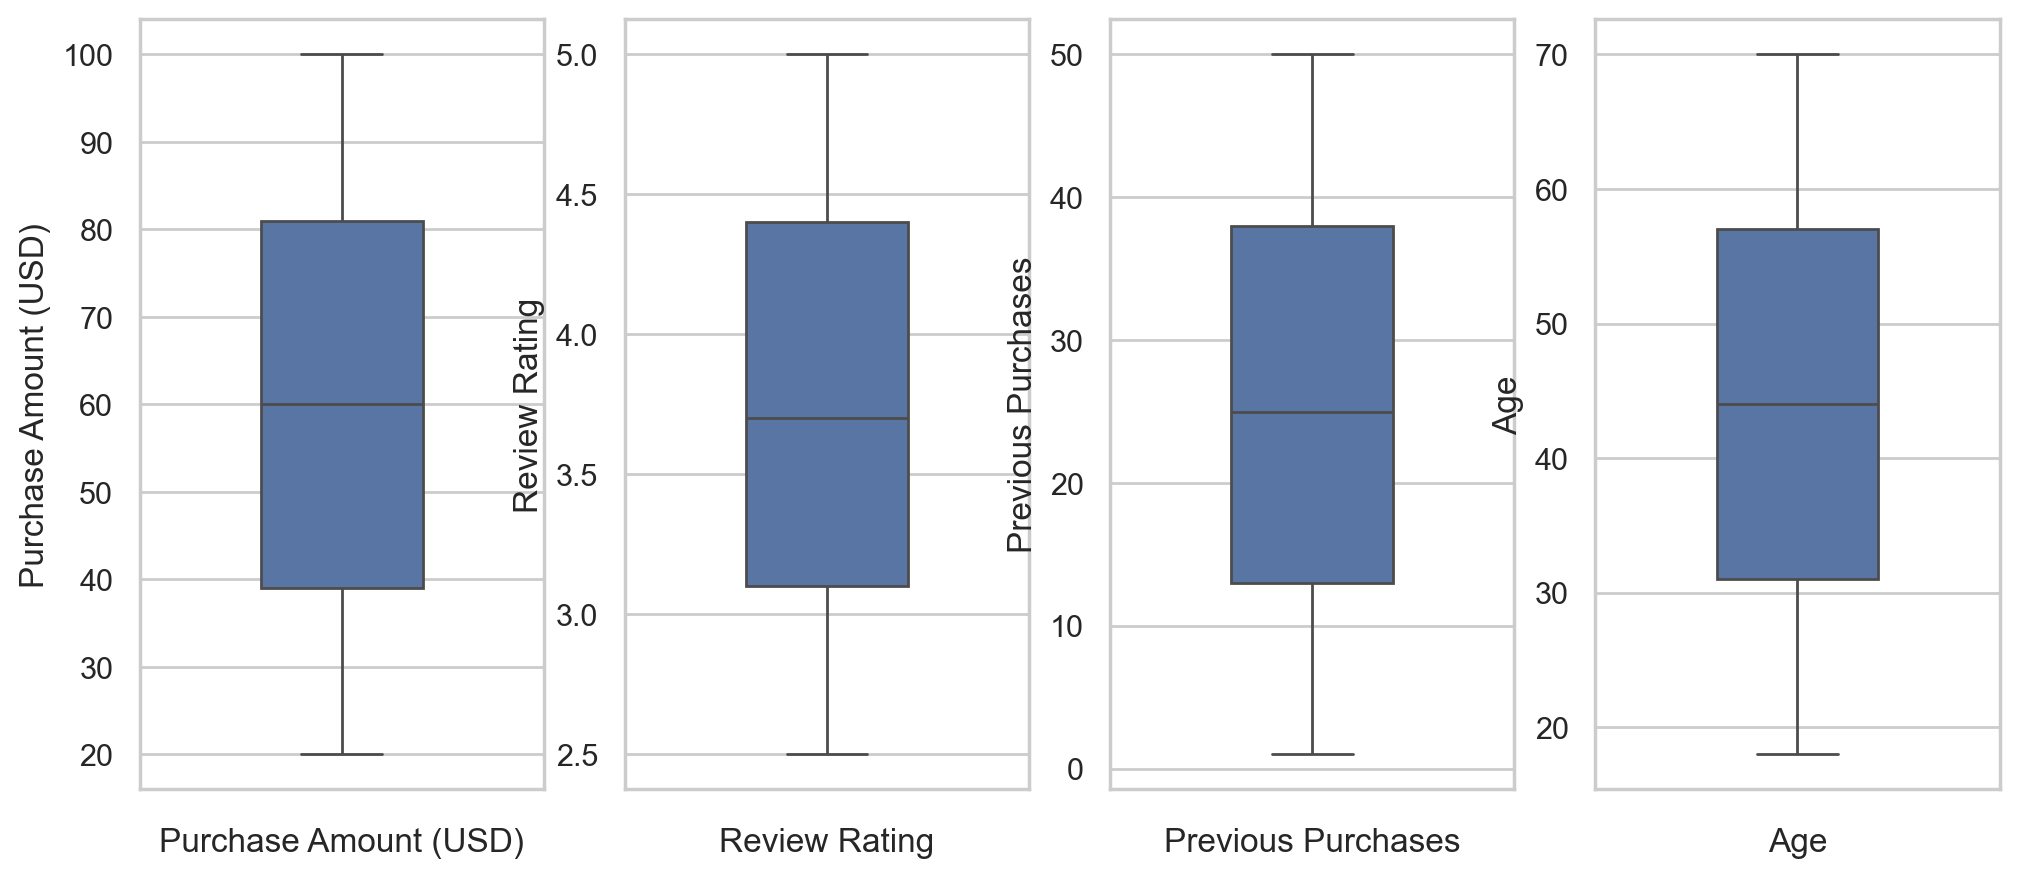

In [12]:
# 수치형 컬럼의 이상치 확인하기

f, ax = plt.subplots(1, 4, figsize = (12, 5))

sns.boxplot(df['Purchase Amount (USD)'], ax=ax[0], width=0.4)
ax[0].set_xlabel('Purchase Amount (USD)')

sns.boxplot(df['Review Rating'], ax=ax[1], width=0.4)
ax[1].set_xlabel('Review Rating')

sns.boxplot(df['Previous Purchases'], ax=ax[2], width=0.4)
ax[2].set_xlabel('Previous Purchases')

sns.boxplot(df['Age'], ax=ax[3], width=0.4)
ax[3].set_xlabel('Age')

plt.show()

In [13]:
import plotly.graph_objects as go
import plotly.express as px

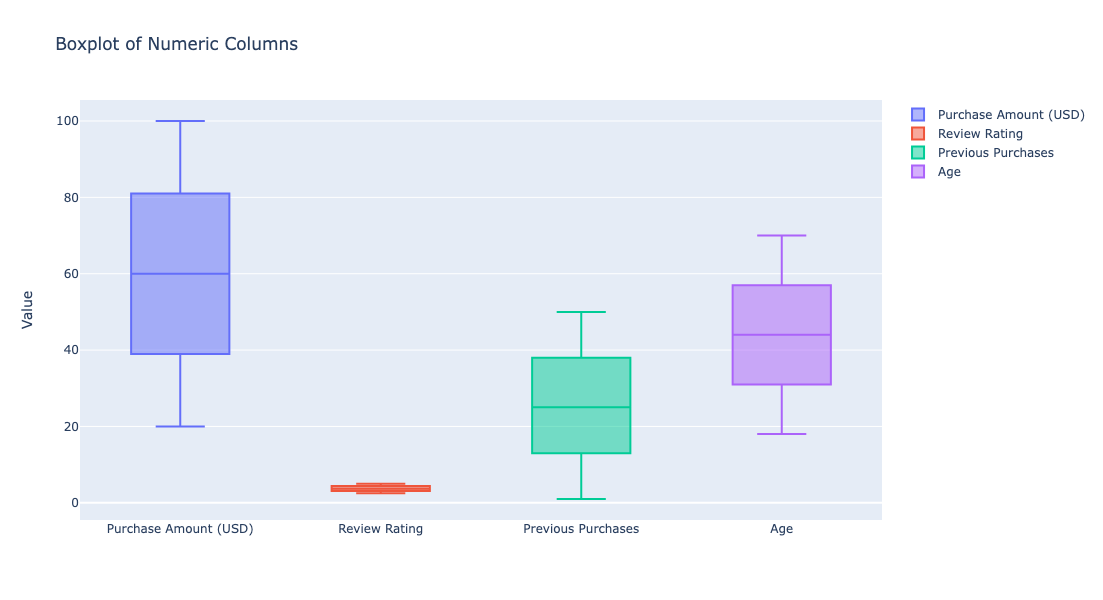

In [14]:
# Create subplots
fig = go.Figure()

# Purchase Amount (USD) boxplot
fig.add_trace(go.Box(y=df['Purchase Amount (USD)'], name='Purchase Amount (USD)'))

# Review Rating boxplot
fig.add_trace(go.Box(y=df['Review Rating'], name='Review Rating'))

# Previous Purchases boxplot
fig.add_trace(go.Box(y=df['Previous Purchases'], name='Previous Purchases'))

# Age boxplot
fig.add_trace(go.Box(y=df['Age'], name='Age'))

# Update layout
fig.update_layout(title='Boxplot of Numeric Columns',
                  xaxis=dict(title=''),
                  yaxis=dict(title='Value'),
                  width=800,  # 그래프의 너비 조절
                  height=600)  # 그래프의 높이 조절

# Show figure
fig.show()



In [15]:
df['Purchase Amount (USD)'].max()

100

In [16]:
df['Purchase Amount (USD)'].min()

20

In [17]:
df[df['Purchase Amount (USD)'] == 20]

Customer ID  Age  Gender Item Purchased     Category  \
5               6   46    Male       Sneakers     Footwear   
26             27   38    Male        Jewelry  Accessories   
52             53   42    Male        T-shirt     Clothing   
255           256   43    Male          Scarf  Accessories   
294           295   70    Male          Skirt     Clothing   
341           342   20    Male            Hat  Accessories   
444           445   48    Male          Dress     Clothing   
507           508   65    Male         Shorts     Clothing   
508           509   27    Male        Jewelry  Accessories   
586           587   45    Male         Hoodie     Clothing   
637           638   21    Male        Sweater     Clothing   
638           639   53    Male        Sandals     Footwear   
800           801   32    Male          Socks     Clothing   
850           851   68    Male          Shoes     Footwear   
867           868   37    Male         Jacket    Outerwear   
977           978   20    Male           Belt  Accessories   
1065         1066   59    Male        T-shirt     Clothing   
1124         1125   42    Male        Sweater     Clothing   
1215         1216   66    Male         Blouse     Clothing   
1403         1404   26    Male       Backpack  Accessories   
1505         1506   46    Male           Belt  Accessories   
1704         1705   56    Male       Sneakers     Footwear   
1723         1724   70    Male          Scarf  Accessories   
1755         1756   56    Male           Belt  Accessories   
1795         1796   68    Male          Jeans     Clothing   
1893         1894   28    Male          Dress     Clothing   
1973         1974   24    Male          Skirt     Clothing   
2045         2046   31    Male        Jewelry  Accessories   
2164         2165   42    Male        Sandals     Footwear   
2209         2210   42    Male        Sandals     Footwear   
2301         2302   37    Male          Pants     Clothing   
2373         2374   37    Male         Hoodie     Clothing   
2438         2439   32    Male          Jeans     Clothing   
2561         2562   32    Male         Hoodie     Clothing   
2579         2580   65    Male         Blouse     Clothing   
2652         2653   23  Female         Shorts     Clothing   
2696         2697   57  Female           Coat    Outerwear   
2798         2799   52  Female         Hoodie     Clothing   
2893         2894   69  Female           Belt  Accessories   
2989         2990   46  Female           Belt  Accessories   
3083         3084   22  Female          Pants     Clothing   
3129         3130   60  Female        Sandals     Footwear   
3130         3131   52  Female          Pants     Clothing   
3251         3252   25  Female           Coat    Outerwear   
3274         3275   46  Female        Sweater     Clothing   
3452         3453   26  Female         Jacket    Outerwear   
3529         3530   55  Female        T-shirt     Clothing   
3638         3639   40  Female       Backpack  Accessories   
3653         3654   67  Female           Coat    Outerwear   
3793         3794   62  Female     Sunglasses  Accessories   
3854         3855   57  Female        T-shirt     Clothing   
3880         3881   42  Female          Shirt     Clothing   

      Purchase Amount (USD)       Location Size      Color  Season  \
5                        20        Wyoming    M      White  Summer   
26                       20         Nevada    M        Red  Spring   
52                       20         Alaska    M      Green  Summer   
255                      20       Maryland    M   Charcoal  Spring   
294                      20     New Jersey    M       Gold  Spring   
341                      20           Utah    S       Blue  Summer   
444                      20     California    M        Red  Summer   
507                      20          Maine    M    Magenta  Spring   
508                      20       Illinois    S     Yellow  Winter   
586                

In [18]:
df[df['Purchase Amount (USD)'] == 100]

Customer ID  Age  Gender Item Purchased     Category  \
42             43   20    Male           Coat    Outerwear   
95             96   37    Male       Sneakers     Footwear   
193           194   36    Male           Belt  Accessories   
204           205   24    Male       Sneakers     Footwear   
243           244   25    Male        Jewelry  Accessories   
248           249   47    Male           Belt  Accessories   
455           456   54    Male         Blouse     Clothing   
518           519   24    Male         Blouse     Clothing   
581           582   32    Male        Sweater     Clothing   
615           616   67    Male        Sandals     Footwear   
769           770   52    Male          Socks     Clothing   
861           862   46    Male          Skirt     Clothing   
1208         1209   20    Male          Boots     Footwear   
1300         1301   67    Male        T-shirt     Clothing   
1405         1406   33    Male          Socks     Clothing   
1412         1413   25    Male         Shorts     Clothing   
1421         1422   68    Male          Dress     Clothing   
1456         1457   59    Male           Coat    Outerwear   
1479         1480   48    Male           Coat    Outerwear   
1591         1592   18    Male          Skirt     Clothing   
1847         1848   46    Male        Sandals     Footwear   
2071         2072   69    Male         Jacket    Outerwear   
2214         2215   50    Male           Belt  Accessories   
2285         2286   34    Male           Belt  Accessories   
2430         2431   20    Male         Jacket    Outerwear   
2802         2803   22  Female           Coat    Outerwear   
2807         2808   56  Female         Hoodie     Clothing   
2842         2843   28  Female           Coat    Outerwear   
2958         2959   55  Female          Skirt     Clothing   
2971         2972   30  Female        Handbag  Accessories   
2994         2995   69  Female        Sweater     Clothing   
3028         3029   62  Female          Dress     Clothing   
3265         3266   40  Female     Sunglasses  Accessories   
3321         3322   32  Female           Coat    Outerwear   
3725         3726   18  Female          Dress     Clothing   
3837         3838   45  Female         Hoodie     Clothing   

      Purchase Amount (USD)        Location Size      Color  Season  \
42                      100       Tennessee    M      Beige  Spring   
95                      100        Missouri    L       Pink    Fall   
193                     100    North Dakota    S     Silver    Fall   
204                     100         Arizona    M     Yellow    Fall   
243                     100        Kentucky    M      Olive  Winter   
248                     100    Pennsylvania    M       Blue  Winter   
455                     100            Utah   XL       Gold    Fall   
518                     100          Oregon    M      Beige    Fall   
581                     100            Iowa   XL   Charcoal  Winter   
615                     100        Maryland    L      Olive  Summer   
769                     100        Delaware    M     Silver  Spring   
861                     100        Virginia   XL      Green  Spring   
1208                    100       Wisconsin    S        Red  Winter   
1300                    100   West Virginia    M   Charcoal  Spring   
1405                    100   New Hampshire    M      Peach  Winter   
1412                    100        Michigan    M   Charcoal  Summer   
1421                    100    Pennsylvania    S       Gold  Spring   
1456                    100         Montana    S      Olive  Spring   
1479                    100      Washington    L      Black  Spring   
1591                    100    South Dakota    L       Gold  Winter   
1847                    100         Arizona   XL       Cyan  Summer   
2071                    100  South Carolina    S     Yellow    Fall   
2214                    100           Idaho    L       Gold    Fall   
2285   

In [19]:
# 상관관계 분석을 위해 범주형 컬럼 변경하기
# 범주형 컬럼 : Gender, Subscription Status, Discount Applied, Frequency of Purchases

# Gender 컬럼 수치형으로 변경하는 함수

def gender_to_num(gender):
  if gender == 'Male':
    return 0
  else:
    return 1

In [20]:
# 수치형으로 변경한 Gender 컬럼 생성

df['gender'] = df['Gender'].apply(gender_to_num)
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  gender  
0          Venmo            Fortnightly       0  
1           Cash            Fortnightly       0  
2    Credit Card                 Weekly       0  
3         PayPal                 Weekly       0  
4         PayPal               Annually       0

In [21]:
# Subscription Status 컬럼 수치형으로 변경하는 함수
def subscription_to_num(subscription_status):
  if subscription_status == 'No':
    return 0
  else:
    return 1

In [22]:
# 수치형으로 변경한 Subscription Status 컬럼 생성
df['subscription_status'] = df['Subscription Status'].apply(subscription_to_num)
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  gender  subscription_status  
0          Venmo            Fortnightly       0                    1  
1           Cash            Fortnightly       0                    1  
2    Credit Card                 Weekly       0                    1  
3         PayPal                 Weekly       0                    1  
4         PayPal               Annually       0                    1

In [23]:
# Discount Applied 컬럼 수치형으로 변경 함수
def discount_to_num(discount_applied):
  if discount_applied == 'No':
    return 0
  else:
    return 1

In [24]:
# 수치형으로 변경한 Discount Applied 컬럼 생성
df['discount_applied'] = df['Discount Applied'].apply(discount_to_num)
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Subscription Status  \
0       Kentucky    L       Gray  Winter  ...                  Yes   
1          Maine    L     Maroon  Winter  ...                  Yes   
2  Massachusetts    S     Maroon  Spring  ...                  Yes   
3   Rhode Island    M     Maroon  Spring  ...                  Yes   
4         Oregon    M  Turquoise  Spring  ...                  Yes   

   Shipping Type Discount Applied Promo Code Used Previous Purchases  \
0        Express              Yes             Yes                 14   
1        Express              Yes             Yes                  2   
2  Free Shipping              Yes             Yes                 23   
3   Next Day Air              Yes             Yes                 49   
4  Free Shipping              Yes             Yes                 31   

   Payment Method Frequency of Purchases gender  subscription_status  \
0           Venmo            Fortnightly      0                    1   
1            Cash            Fortnightly      0                    1   
2     Credit Card                 Weekly      0                    1   
3          PayPal                 Weekly      0                    1   
4          PayPal               Annually      0                    1   

   discount_applied  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 21 columns]

In [25]:
# Frequency of Purchases 컬럼 수치형으로 변경하는 함수
def frequency_to_num(frequency_of_purchases):
  if frequency_of_purchases == 'Weekly':
    return 5
  elif frequency_of_purchases in ['Fortnightly', 'Bi-Weekly']:
    return 4
  elif frequency_of_purchases == 'Monthly':
    return 3
  elif frequency_of_purchases in ['Every 3 Months', 'Quarterly']:
    return 2
  else:
    return 1

In [26]:
# 수치형으로 변경한 Frequency of Purchases 컬럼 생성
df['frequency_of_purchases'] = df['Frequency of Purchases'].apply(frequency_to_num)
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Shipping Type Discount Applied  \
0       Kentucky    L       Gray  Winter  ...        Express              Yes   
1          Maine    L     Maroon  Winter  ...        Express              Yes   
2  Massachusetts    S     Maroon  Spring  ...  Free Shipping              Yes   
3   Rhode Island    M     Maroon  Spring  ...   Next Day Air              Yes   
4         Oregon    M  Turquoise  Spring  ...  Free Shipping              Yes   

  Promo Code Used Previous Purchases Payment Method  Frequency of Purchases  \
0             Yes                 14          Venmo             Fortnightly   
1             Yes                  2           Cash             Fortnightly   
2             Yes                 23    Credit Card                  Weekly   
3             Yes                 49         PayPal                  Weekly   
4             Yes                 31         PayPal                Annually   

  gender subscription_status  discount_applied  frequency_of_purchases  
0      0                   1                 1                       4  
1      0                   1                 1                       4  
2      0                   1                 1                       5  
3      0                   1                 1                       5  
4      0                   1                 1                       1  

[5 rows x 22 columns]

In [27]:
df

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2                        73  Massachusetts    S     Maroon  Spring  ...   
3                        90   Rhode Island    M     Maroon  Spring  ...   
4                        49         Oregon    M  Turquoise  Spring  ...   
...                     ...            ...  ...        ...     ...  ...   
3895                     28       Virginia    L  Turquoise  Summer  ...   
3896                     49           Iowa    L      White  Spring  ...   
3897                     33     New Jersey    L      Green  Spring  ...   
3898                     77      Minnesota    S      Brown  Summer  ...   
3899                     81     California    M      Beige  Spring  ...   

       Shipping Type Discount Applied Promo Code Used Previous Purchases  \
0            Express              Yes             Yes                 14   
1            Express              Yes             Yes                  2   
2      Free Shipping              Yes             Yes                 23   
3       Next Day Air              Yes             Yes                 49   
4      Free Shipping              Yes             Yes                 31   
...              ...              ...             ...                ...   
3895  2-Day Shipping               No              No                 32   
3896    Store Pickup               No              No                 41   
3897        Standard               No              No                 24   
3898         Express               No              No                 24   
3899    Store Pickup               No              No                 33   

     Payment Method  Frequency of Purchases gender subscription_status  \
0             Venmo             Fortnightly      0                   1   
1              Cash             Fortnightly      0                   1   
2       Credit Card                  Weekly      0                   1   
3            PayPal                  Weekly      0                   1   
4            PayPal                Annually      0                   1   
...             ...                     ...    ...                 ...   
3895          Venmo                  Weekly      1                   0   
3896  Bank Transfer               Bi-Weekly      1                   0   
3897          Venmo               Quarterly      1                   0   
3898          Venmo                  Weekly      1                   0   
3899          Venmo               Quarterly      1                   0   

      discount_applied  frequency_of_purchases  
0                    1                       4  
1                    1                       4  
2                    1                       5  
3                    1                       5  
4                    1                       1  
...                ...                     ...  
3895                 0                       5  
3896                 0                       4  
3897                 0                       2  
3898                 0                       5  
3899               

In [28]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'gender',
       'subscription_status', 'discount_applied', 'frequency_of_purchases'],
      dtype='object')

In [29]:
# 컬럼별 상관계수 확인
corr=df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'gender',
       'subscription_status', 'discount_applied', 'frequency_of_purchases']].corr(method='pearson')
corr

Age  Purchase Amount (USD)  Review Rating  \
Age                     1.000000              -0.010424      -0.021949   
Purchase Amount (USD)  -0.010424               1.000000       0.030776   
Review Rating          -0.021949               0.030776       1.000000   
gender                 -0.002763               0.014044      -0.008164   
subscription_status     0.006492              -0.006996      -0.006368   
discount_applied        0.004366              -0.017798      -0.012486   
frequency_of_purchases -0.009725              -0.012473      -0.004025   

                          gender  subscription_status  discount_applied  \
Age                    -0.002763             0.006492          0.004366   
Purchase Amount (USD)   0.014044            -0.006996         -0.017798   
Review Rating          -0.008164            -0.006368         -0.012486   
gender                  1.000000            -0.417197         -0.595823   
subscription_status    -0.417197             1.000000          0.700202   
discount_applied       -0.595823             0.700202          1.000000   
frequency_of_purchases  0.004067             0.011689          0.006064   

                        frequency_of_purchases  
Age                                  -0.009725  
Purchase Amount (USD)                -0.012473  
Review Rating                        -0.004025  
gender                                0.004067  
subscription_status                   0.011689  
discount_applied                      0.006064  
frequency_of_purchases                1.000000

([<matplotlib.axis.YTick at 0x7fefdda4bb80>,
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Purchase Amount (USD)'),
  Text(0, 2.5, 'Review Rating'),
  Text(0, 3.5, 'gender'),
  Text(0, 4.5, 'subscription_status'),
  Text(0, 5.5, 'discount_applied'),
  Text(0, 6.5, 'frequency_of_purchases')])

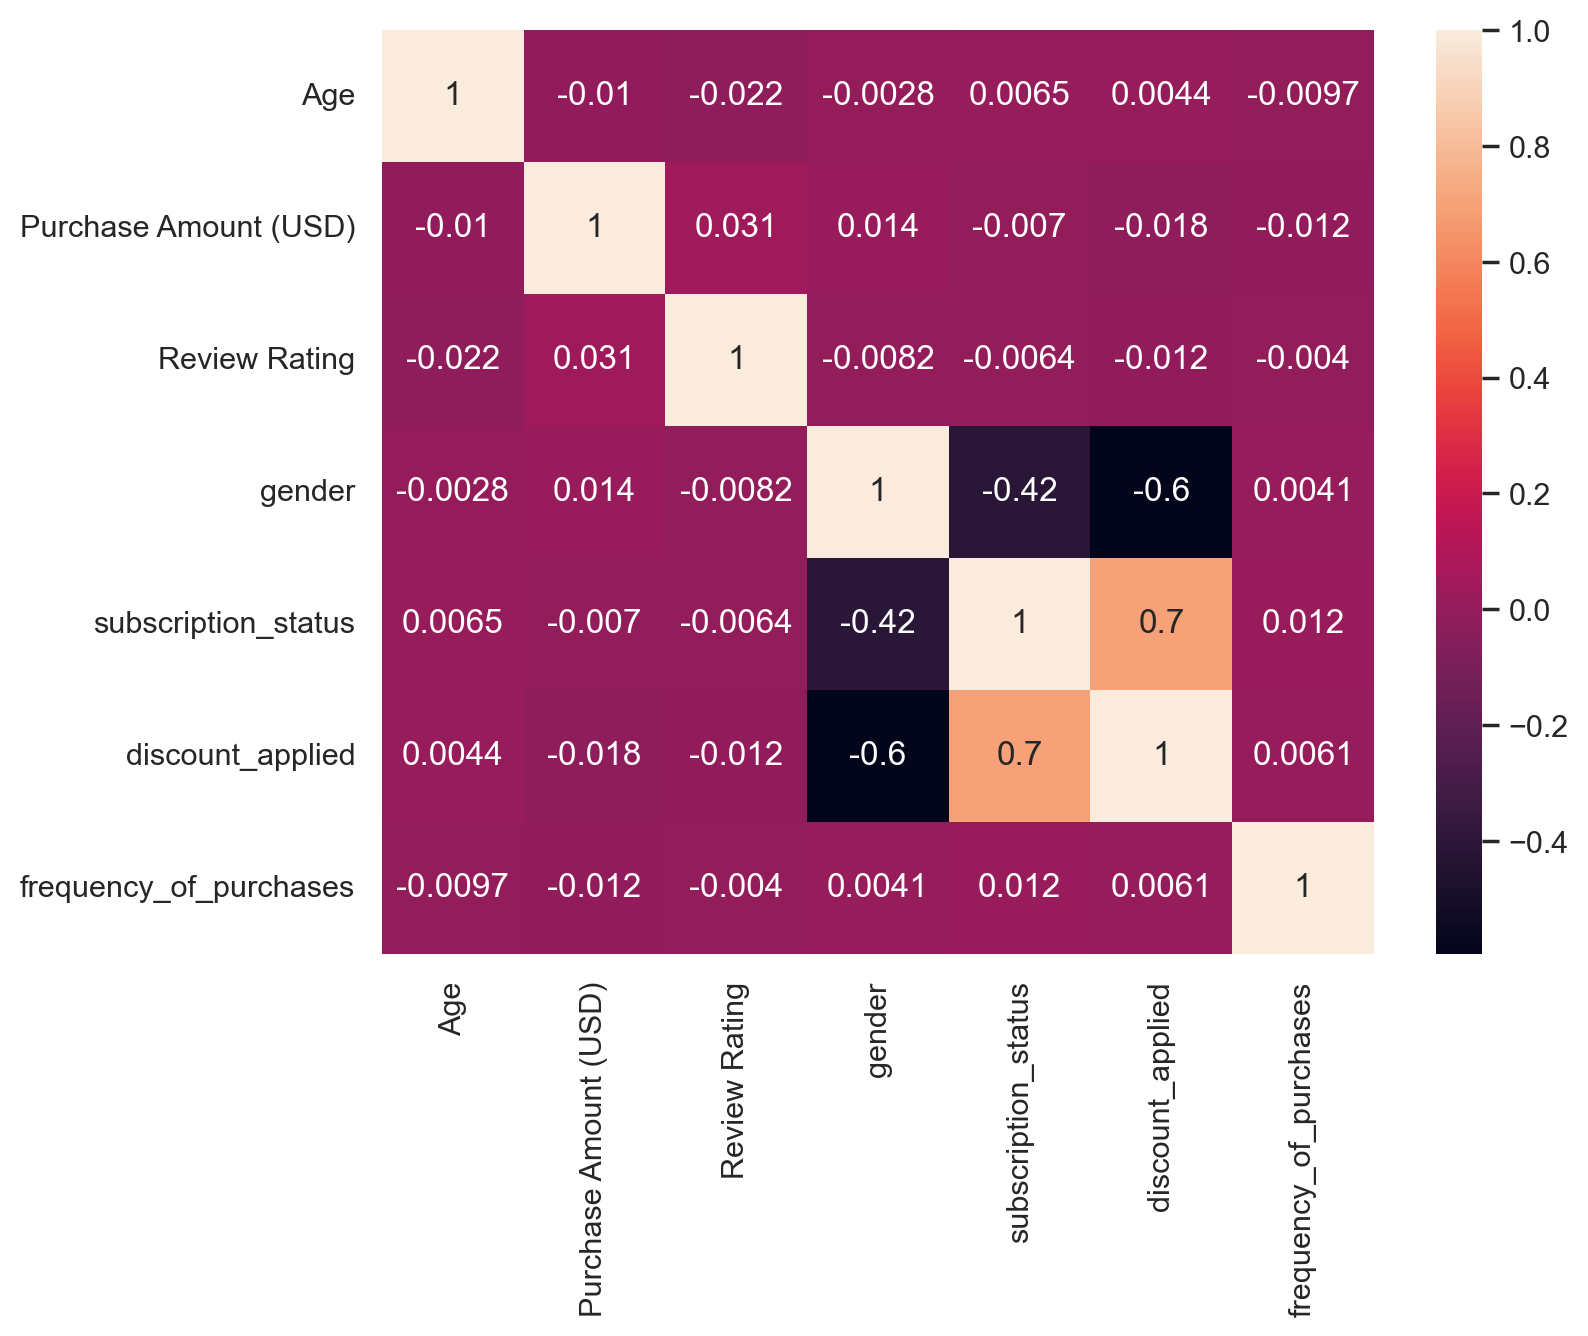

In [30]:
# 각 컬럼별 상관계수 확인

fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')

sns.heatmap(corr.values,annot=True)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns, rotation=90)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index, rotation=0)

In [31]:
# Frequency of Purchases 컬럼을 일년 예상구매 횟수로 바꾸는 함수(예상 구매 횟수)
def times_per_annual(frequency_of_purchases):
  if frequency_of_purchases in ['Bi-Weekly', 'Fortnightly']:
    return 26
  elif frequency_of_purchases in ['Every 3 Months', 'Quarterly']:
    return 4
  elif frequency_of_purchases == 'Weekly':
    return 52
  elif frequency_of_purchases == 'Annually':
    return 1
  elif frequency_of_purchases == 'Monthly':
    return 12

In [32]:
# 일년 예상구매 횟수 컬럼 생성
df['purchases_times_per_annual'] = df['Frequency of Purchases'].apply(times_per_annual)
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Discount Applied  \
0       Kentucky    L       Gray  Winter  ...               Yes   
1          Maine    L     Maroon  Winter  ...               Yes   
2  Massachusetts    S     Maroon  Spring  ...               Yes   
3   Rhode Island    M     Maroon  Spring  ...               Yes   
4         Oregon    M  Turquoise  Spring  ...               Yes   

  Promo Code Used Previous Purchases Payment Method Frequency of Purchases  \
0             Yes                 14          Venmo            Fortnightly   
1             Yes                  2           Cash            Fortnightly   
2             Yes                 23    Credit Card                 Weekly   
3             Yes                 49         PayPal                 Weekly   
4             Yes                 31         PayPal               Annually   

   gender subscription_status discount_applied  frequency_of_purchases  \
0       0                   1                1                       4   
1       0                   1                1                       4   
2       0                   1                1                       5   
3       0                   1                1                       5   
4       0                   1                1                       1   

   purchases_times_per_annual  
0                          26  
1                          26  
2                          52  
3                          52  
4                           1  

[5 rows x 23 columns]

In [33]:
# 고객 남녀 성비 확인
df_gender = df.groupby('Gender')['Customer ID'].count().sort_values(ascending=False)/df['Customer ID'].count()*100
df_gender

Gender
Male      68.0
Female    32.0
Name: Customer ID, dtype: float64

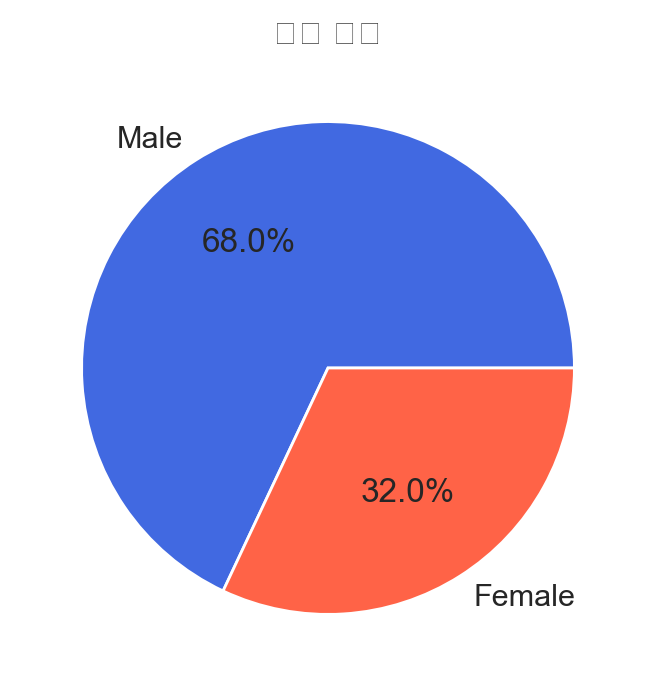

In [34]:
# 고객 남녀 비율 그래프
plt.figure(figsize=(6,4))
plt.pie(df_gender, labels = df_gender.index, autopct = '%.1f%%', colors=['royalblue', 'tomato'])

plt.title('고객 성비')
plt.show()

In [35]:
# Age 컬럼을 구간별로 나누는 함수
def age_cat(age):
  return (age//10) * 10

In [36]:
# Age 컬럼을 구간별로 카테고리화한 컬럼 생성
df['Age2'] = df['Age'].apply(age_cat)
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Promo Code Used  \
0       Kentucky    L       Gray  Winter  ...              Yes   
1          Maine    L     Maroon  Winter  ...              Yes   
2  Massachusetts    S     Maroon  Spring  ...              Yes   
3   Rhode Island    M     Maroon  Spring  ...              Yes   
4         Oregon    M  Turquoise  Spring  ...              Yes   

  Previous Purchases Payment Method Frequency of Purchases gender  \
0                 14          Venmo            Fortnightly      0   
1                  2           Cash            Fortnightly      0   
2                 23    Credit Card                 Weekly      0   
3                 49         PayPal                 Weekly      0   
4                 31         PayPal               Annually      0   

   subscription_status discount_applied frequency_of_purchases  \
0                    1                1                      4   
1                    1                1                      4   
2                    1                1                      5   
3                    1                1                      5   
4                    1                1                      1   

   purchases_times_per_annual  Age2  
0                          26    50  
1                          26    10  
2                          52    50  
3                          52    20  
4                           1    40  

[5 rows x 24 columns]

In [37]:
# 고객 연령대 확인
df_by_age2 = df.groupby('Age2')['Customer ID'].count()
df_by_age2

Age2
10    150
20    728
30    724
40    739
50    771
60    721
70     67
Name: Customer ID, dtype: int64

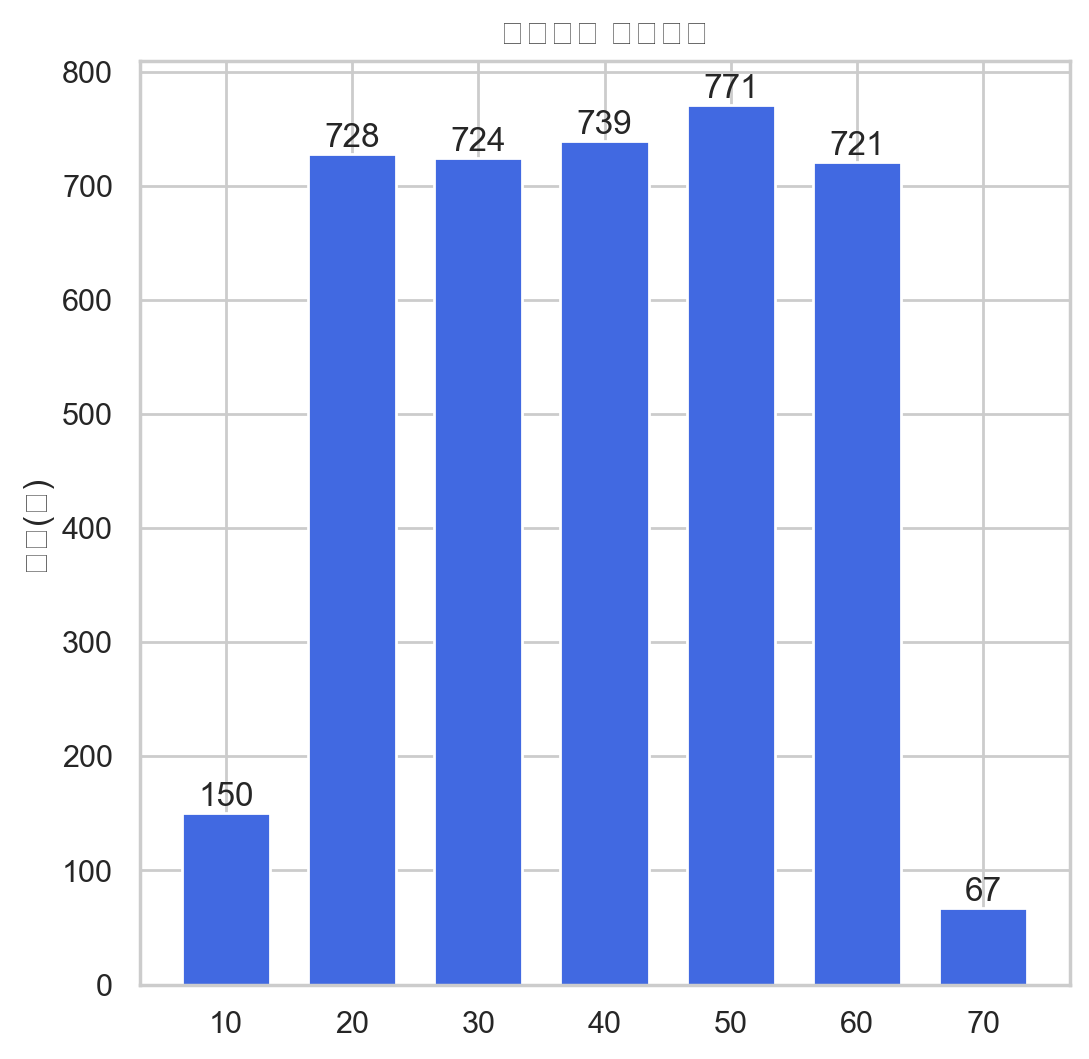

In [38]:
# 연령대별 고객수 그래프
plt.figure(figsize=(6,6))
bar = plt.bar(df_by_age2.index, df_by_age2, width=7, color='royalblue')

for rect in bar:
    height = rect.get_height()
		#bar의 가장 정 가운데 x 좌표 구하기 : get_x()로 x축의 가장 왼쪽 부분 + get_width의 절반 값
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height , ha='center', va='bottom', size = 12)

plt.title('연령대별 고객분포')
plt.xlabel('')
plt.ylabel('사람(명)')

plt.xticks(rotation=0)
plt.show()

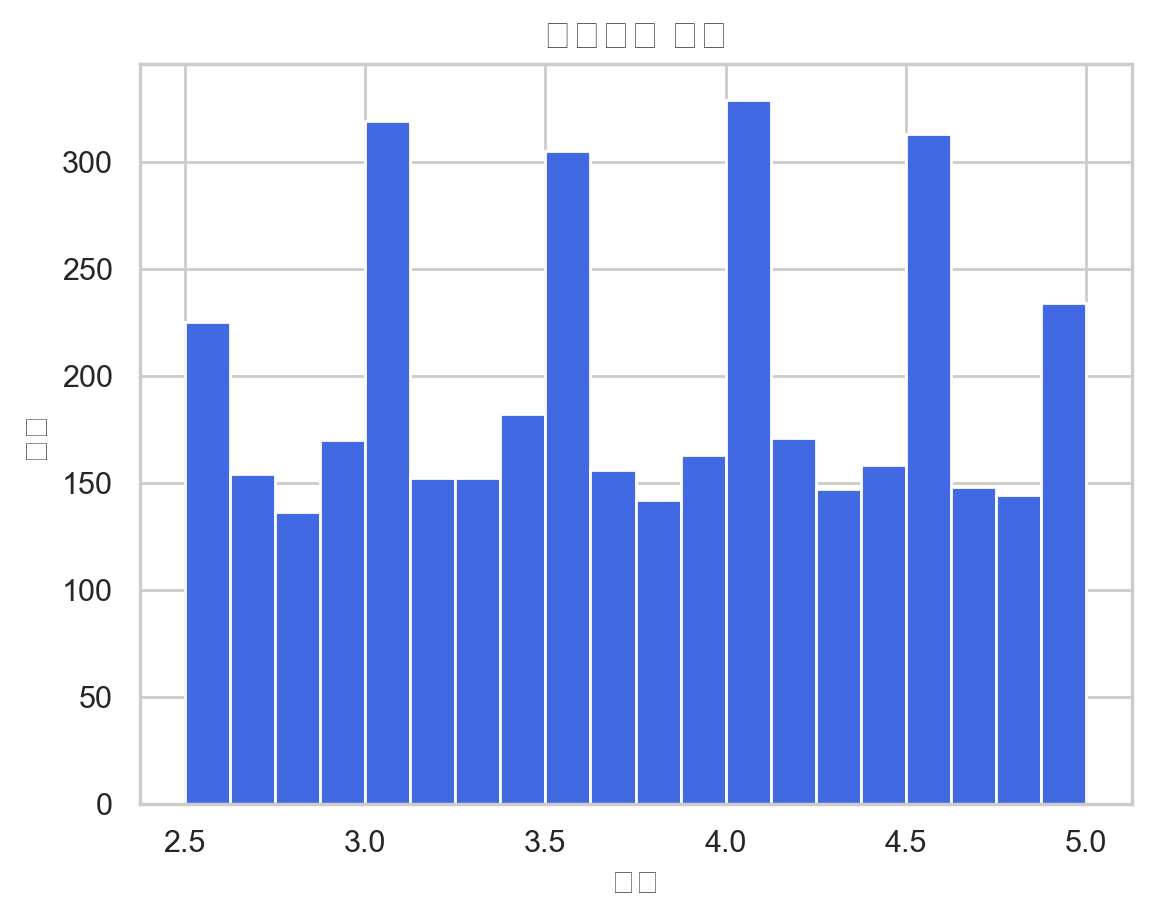

In [39]:
# Review Rating컬럼 분포 확인하기

data = df['Review Rating']
plt.hist(data, bins=20, color='royalblue')
plt.title('리뷰점수 분포', fontsize=14)
plt.xlabel('점수')
plt.ylabel('빈도')
plt.show()

In [40]:
# Size별 판매량 확인
df_by_size = df.groupby('Size')['Customer ID'].count().sort_index().loc[['S', 'M', 'L', 'XL']]
df_by_size

Size
S      663
M     1755
L     1053
XL     429
Name: Customer ID, dtype: int64

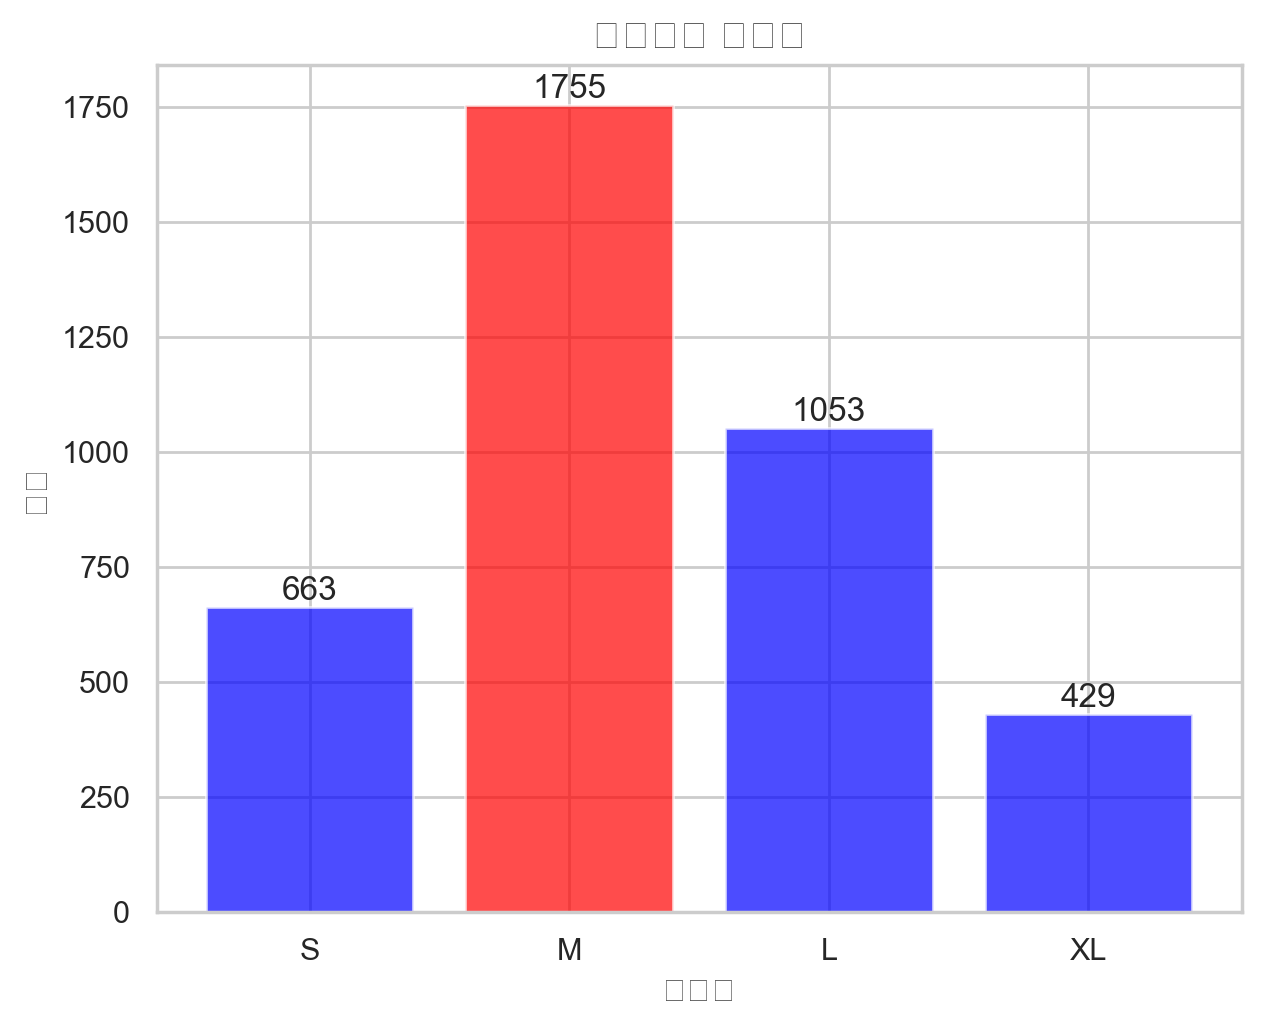

In [41]:
# Size별 판매량 그래프
plt.figure(figsize=(7,5.5))
color=['blue', 'red','blue', 'blue']
bar = plt.bar(df_by_size.index, df_by_size, color=color, alpha=0.7)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 12)

plt.title('사이즈별 판매량', fontsize=14)
plt.xlabel('사이즈')
plt.ylabel('개수', fontsize=12)
plt.xticks()

plt.show()

In [42]:
# Location별 판매량 확인
df_by_location = df.groupby('Location')['Customer ID'].count().sort_values(ascending=False)
df_by_location

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
Nevada            87
New York          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Arkansas          79
Georgia           79
Indiana           79
Kentucky          79
North Carolina    78
Connecticut       78
Tennessee         77
Ohio              77
Texas             77
Virginia          77
Maine             77
South Carolina    76
Wisconsin         75
Oklahoma          75
Colorado          75
Pennsylvania      74
Oregon            74
Michigan          73
Washington        73
Massachusetts     72
Alaska            72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Arizona           65
Hawa

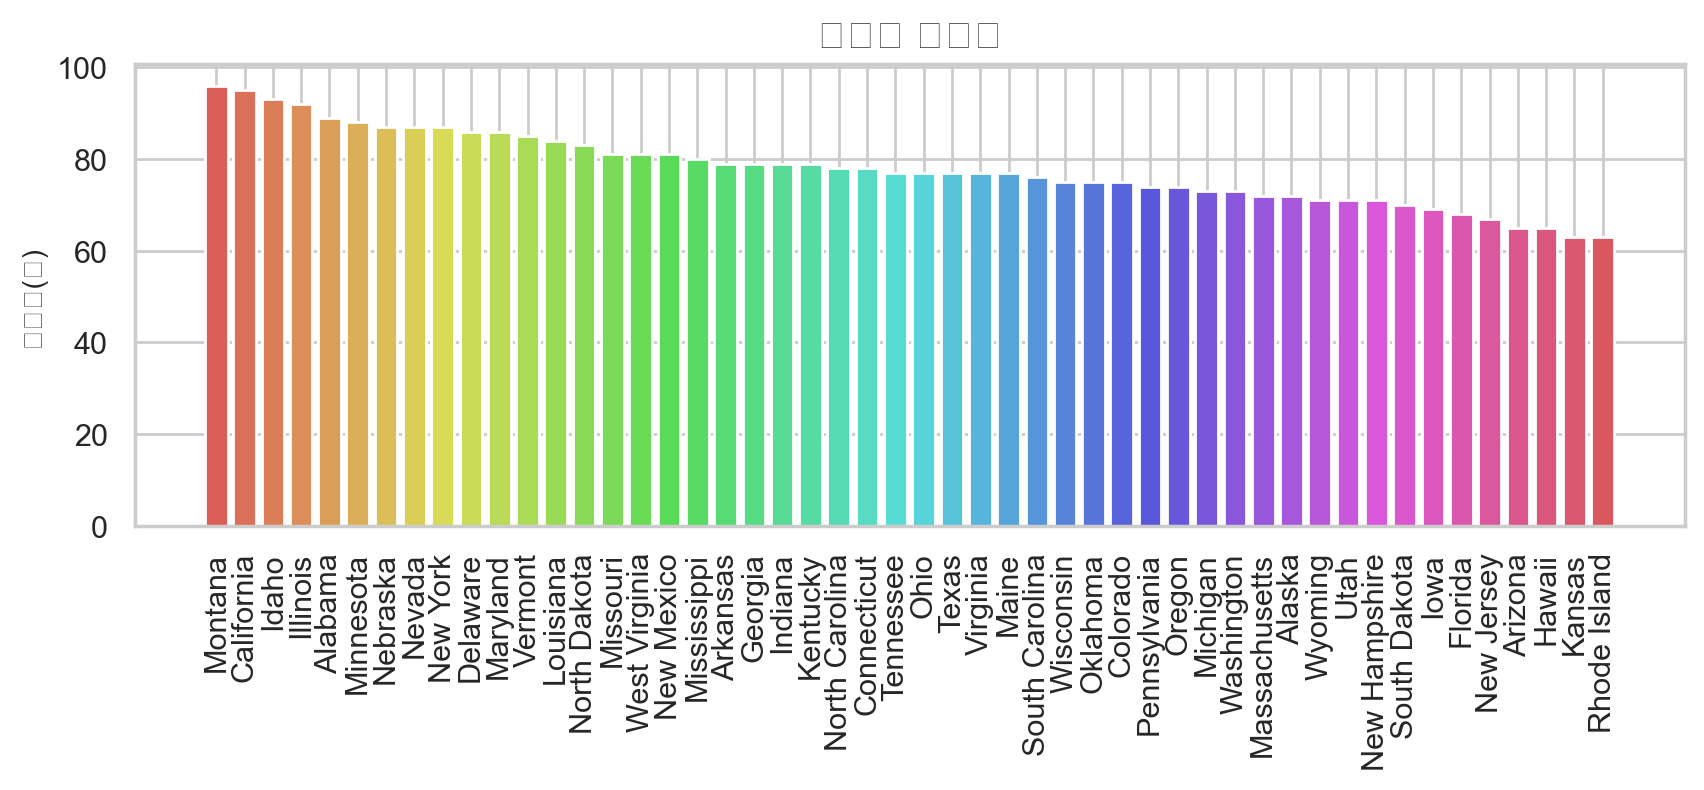

In [43]:
# Location별 판매량 그래프
plt.figure(figsize=(10,3))
colors = sns.color_palette('hls',len(df_by_location))
plt.bar(df_by_location.index, df_by_location, color=colors)

plt.title('지역별 판매량', fontsize=14)
plt.xlabel('')
plt.ylabel('판매량(개)', fontsize=10)
plt.xticks(rotation=90)

plt.show()

In [44]:
# Payment Method별 거래수 확인
df_by_payment = df.groupby('Payment Method')['Customer ID'].count().sort_values()
df_by_payment

Payment Method
Bank Transfer    612
Venmo            634
Debit Card       636
Cash             670
Credit Card      671
PayPal           677
Name: Customer ID, dtype: int64

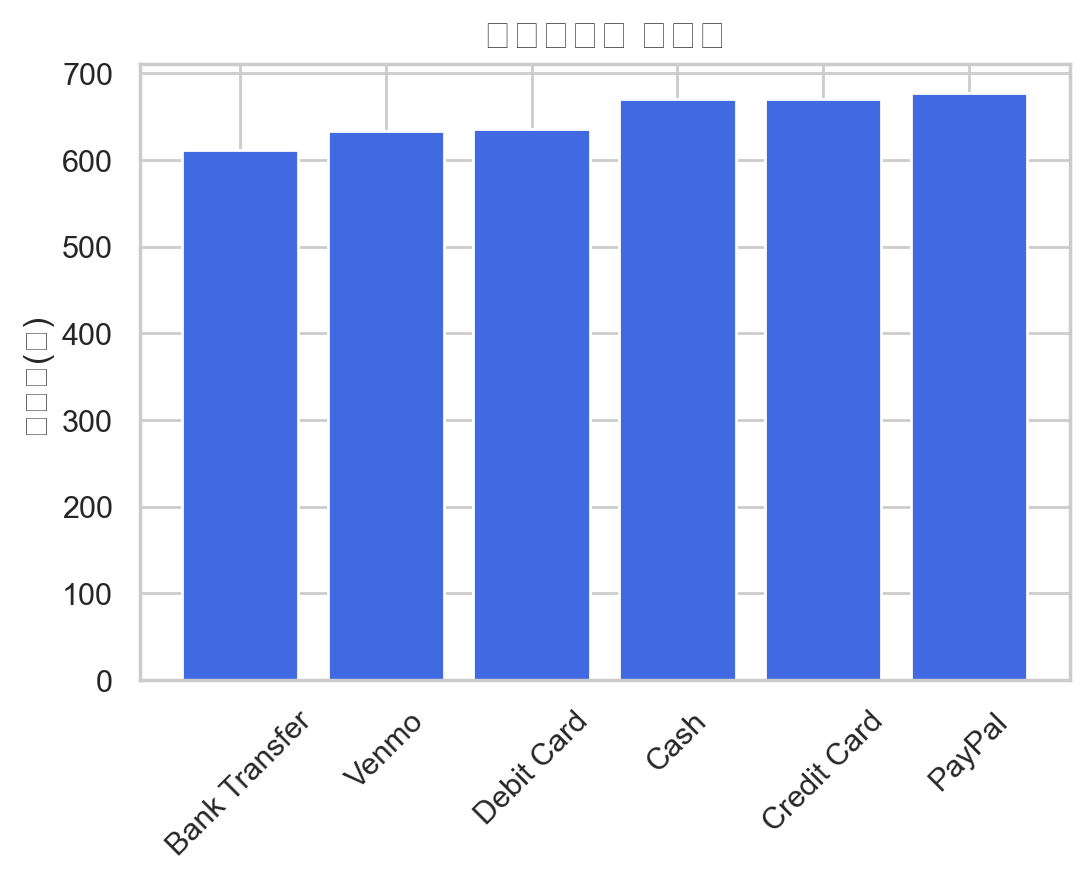

In [45]:
# Payment Method별 거래수 그래프
plt.figure(figsize=(6,4))
plt.bar(df_by_payment.index, df_by_payment, color='royalblue')

plt.title('결제방법별 거래수', fontsize=14)
plt.xlabel('')
plt.ylabel('거래수(건)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

In [46]:
# Shipping Type별 거래수 확인
df_by_shipping = df.groupby('Shipping Type')['Customer ID'].count().sort_values()
df_by_shipping

Shipping Type
2-Day Shipping    627
Express           646
Next Day Air      648
Store Pickup      650
Standard          654
Free Shipping     675
Name: Customer ID, dtype: int64

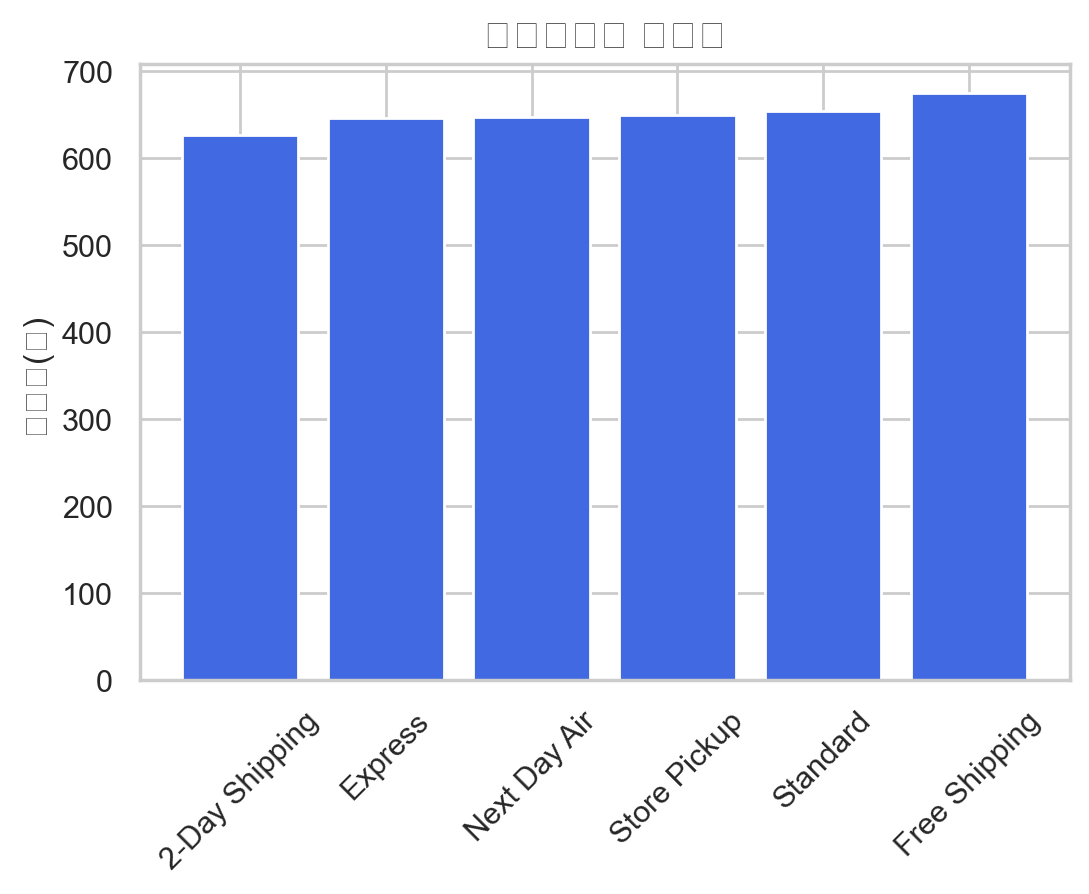

In [47]:
# Shipping Type별 거래수 그래프
plt.figure(figsize=(6,4))
plt.bar(df_by_shipping.index, df_by_shipping, color='royalblue')

plt.title('배송타입별 거래수', fontsize=14)
plt.xlabel('')
plt.ylabel('거래수(건)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

In [48]:
# 이제 심층분석 : 보통 매출 증대를 위해 할인 프로모션을 하는 경우가 많으니 할인 프로모션을 생각해보자
# 할인 프로모션을 하는 것이 타당한지 보기 위해 매출액, 구매빈도와 할인적용 컬럼의 상관관계를 보자

# 구매금액(Purchase Amount)컬럼, 할인(Discount Applied)컬럼, 1년동안의 예상 구매 횟수(purchased_times_per_annual)컬럼의 상관계수 확인

corr2 = df[['Purchase Amount (USD)', 'discount_applied', 'purchases_times_per_annual']].corr(method='pearson')
corr2

Purchase Amount (USD)  discount_applied  \
Purchase Amount (USD)                    1.000000         -0.017798   
discount_applied                        -0.017798          1.000000   
purchases_times_per_annual              -0.013138          0.004334   

                            purchases_times_per_annual  
Purchase Amount (USD)                        -0.013138  
discount_applied                              0.004334  
purchases_times_per_annual                    1.000000

([<matplotlib.axis.YTick at 0x7fefdee56b80>,
 [Text(0, 0.5, 'Purchase Amount (USD)'),
  Text(0, 1.5, 'discount_applied'),
  Text(0, 2.5, 'purchases_times_per_annual')])

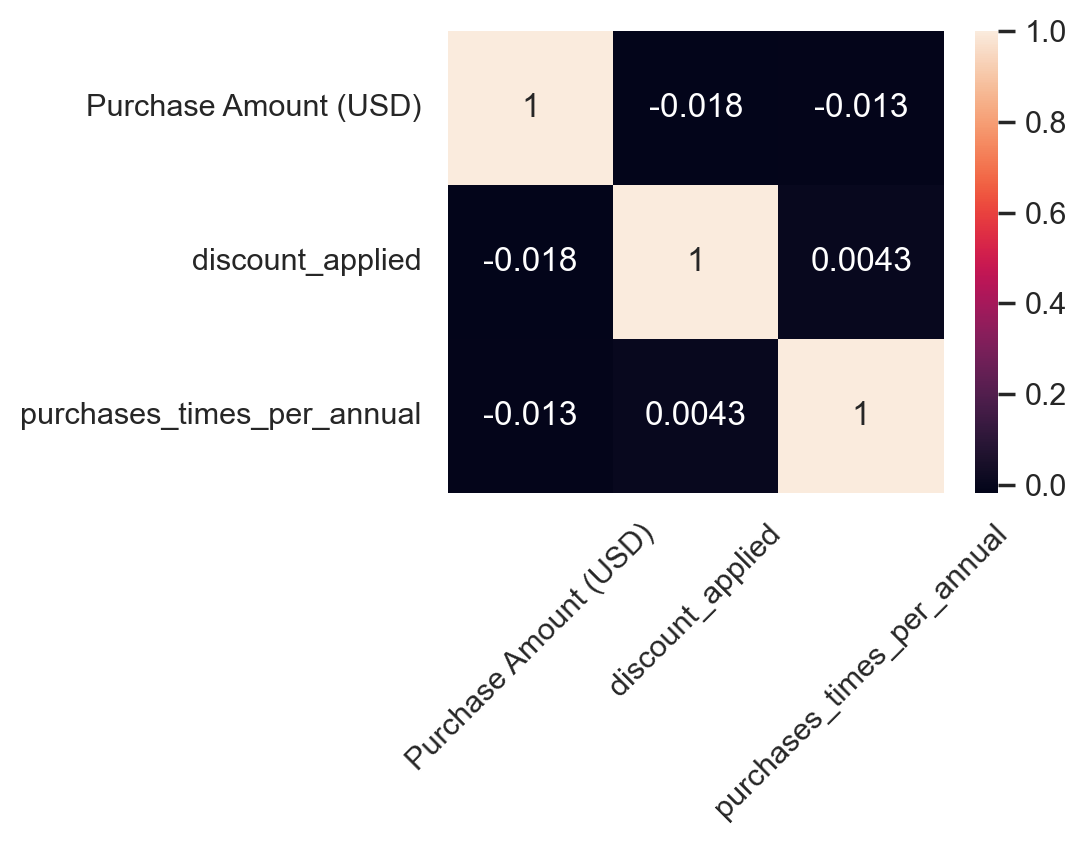

In [49]:
# 구매금액(Purchase Amount)컬럼, 할인(Discount Applied)컬럼, 1년동안의 예상 구매 횟수(purchased_times_per_annual)컬럼의 상관계수 그래프

fig = plt.figure(figsize=(4,3))
fig.set_facecolor('white')

sns.heatmap(corr2.values,annot=True)
plt.xticks(np.arange(0.5, len(corr2.columns), 1), corr2.columns, rotation=45)
plt.yticks(np.arange(0.5, len(corr2.index), 1), corr2.index, rotation=0)

In [50]:
# 전체고객을 대상으로 보면 상관관계가 있어보이지 않는다. 심슨의 역설이 생길 수 있으니 Regular고객과 VIP고객으로 클러스터링 한 후 상관관계가 있는지 확인하자
# VIP고객부터 확인
# VIP 정의 : Frequency of Purchases 컬럼을 바탕으로 1년동안의 구매횟수를 추정하여 purchases_times_per_annual컬럼 생성
# purchases_times_per_annual 컬럼에서 1년에 26회 이상 구매한 고객을 VIP, 미만은 Regular 고객이라 지칭


In [51]:
# VIP-Regular 고객으로 카테고리화 하는 함수

def customer_re_grouping(purchases_times_per_annual):
  if purchases_times_per_annual >= 26:
    return 'VIP'
  else:
    return 'Regular'

In [52]:
# VIP-Regular 카테고리화 된 컬럼 생성
df['customer_type2'] = df['purchases_times_per_annual'].apply(customer_re_grouping)
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Previous Purchases  \
0       Kentucky    L       Gray  Winter  ...                  14   
1          Maine    L     Maroon  Winter  ...                   2   
2  Massachusetts    S     Maroon  Spring  ...                  23   
3   Rhode Island    M     Maroon  Spring  ...                  49   
4         Oregon    M  Turquoise  Spring  ...                  31   

  Payment Method Frequency of Purchases gender subscription_status  \
0          Venmo            Fortnightly      0                   1   
1           Cash            Fortnightly      0                   1   
2    Credit Card                 Weekly      0                   1   
3         PayPal                 Weekly      0                   1   
4         PayPal               Annually      0                   1   

   discount_applied frequency_of_purchases purchases_times_per_annual  Age2  \
0                 1                      4                         26    50   
1                 1                      4                         26    10   
2                 1                      5                         52    50   
3                 1                      5                         52    20   
4                 1                      1                          1    40   

   customer_type2  
0             VIP  
1             VIP  
2             VIP  
3             VIP  
4         Regular  

[5 rows x 25 columns]

In [53]:
# VIP고객의 Purchase Amount, discount_applied, purchases_times_per_annual 컬럼 상관관계 보기

df_by_VIP = df[df['customer_type2'] == 'VIP']
corr3 = df_by_VIP[['Purchase Amount (USD)', 'discount_applied', 'purchases_times_per_annual']].corr(method='pearson')
corr3

Purchase Amount (USD)  discount_applied  \
Purchase Amount (USD)                    1.000000         -0.016324   
discount_applied                        -0.016324          1.000000   
purchases_times_per_annual              -0.018021          0.003294   

                            purchases_times_per_annual  
Purchase Amount (USD)                        -0.018021  
discount_applied                              0.003294  
purchases_times_per_annual                    1.000000

([<matplotlib.axis.YTick at 0x7fefdd29c0d0>,
 [Text(0, 0.5, 'Purchase Amount (USD)'),
  Text(0, 1.5, 'discount_applied'),
  Text(0, 2.5, 'purchases_times_per_annual')])

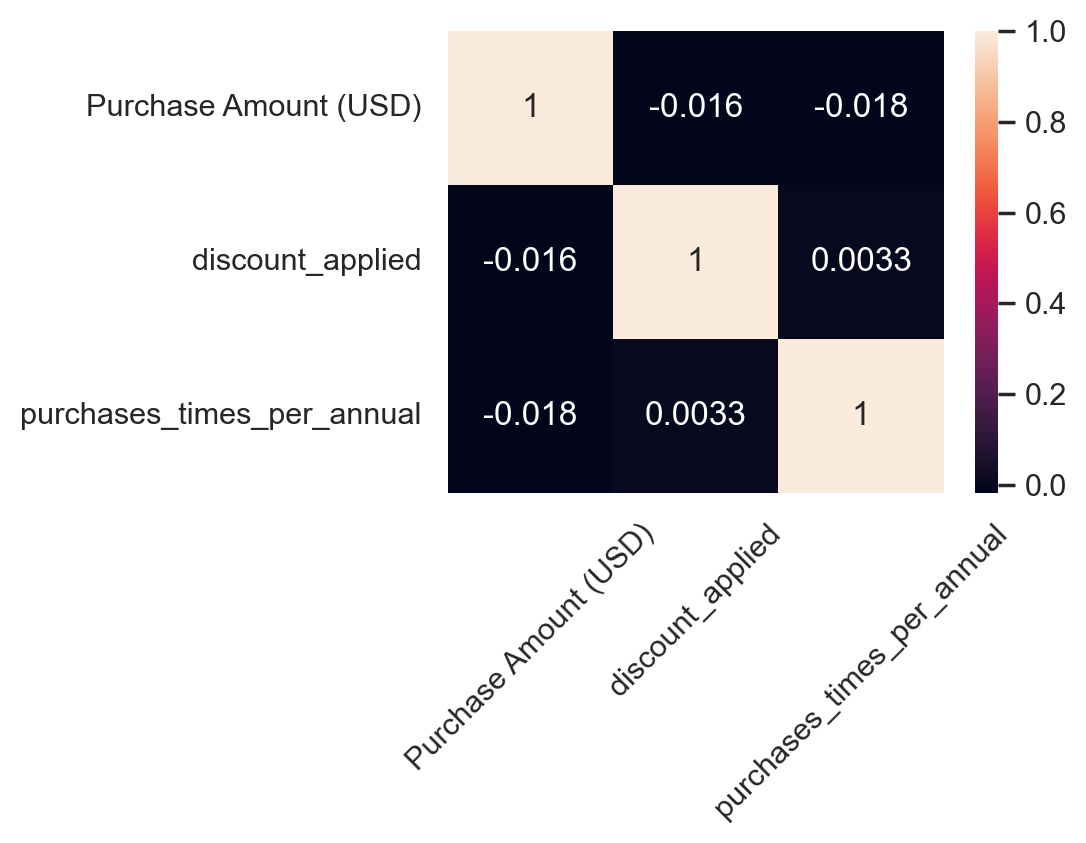

In [54]:
# VIP고객의 Purchase Amount, discount_applied, purchases_times_per_annual 컬럼 상관계수 그래프

fig = plt.figure(figsize=(4,3))
fig.set_facecolor('white')

sns.heatmap(corr3.values,annot=True)
plt.xticks(np.arange(0.5, len(corr3.columns), 1), corr3.columns, rotation=45)
plt.yticks(np.arange(0.5, len(corr3.index), 1), corr3.index, rotation=0)

In [55]:
# Regular 고객의 Purchase Amount, discount_applied, purchases_times_per_annual 컬럼 상관관계 보기

df_by_Regualr = df[df['customer_type2'] == 'Regular']
corr4 = df_by_Regualr[['Purchase Amount (USD)', 'discount_applied', 'purchases_times_per_annual']].corr(method='pearson')
corr4

Purchase Amount (USD)  discount_applied  \
Purchase Amount (USD)                    1.000000         -0.018818   
discount_applied                        -0.018818          1.000000   
purchases_times_per_annual              -0.013657          0.004628   

                            purchases_times_per_annual  
Purchase Amount (USD)                        -0.013657  
discount_applied                              0.004628  
purchases_times_per_annual                    1.000000

([<matplotlib.axis.YTick at 0x7fefdd3320d0>,
 [Text(0, 0.5, 'Purchase Amount (USD)'),
  Text(0, 1.5, 'discount_applied'),
  Text(0, 2.5, 'purchases_times_per_annual')])

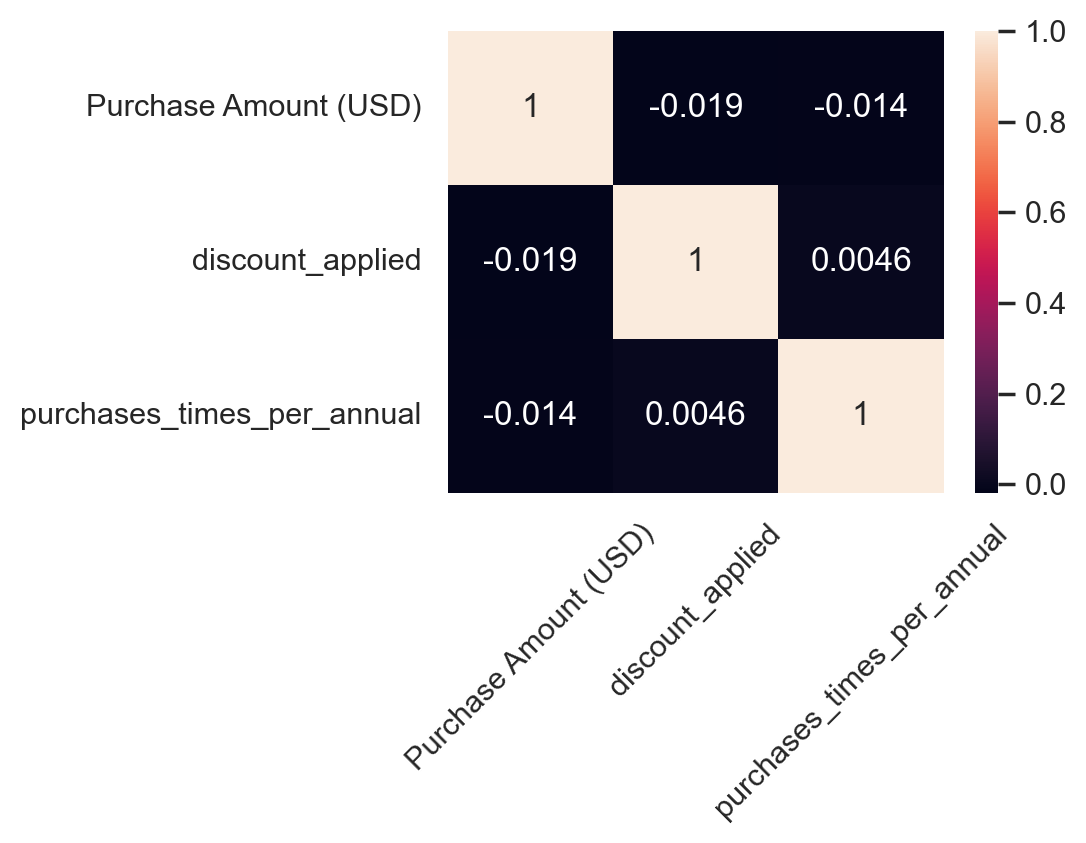

In [56]:
# Regular 고객의 Purchase Amount, discount_applied, purchases_times_per_annual 컬럼 상관계수 그래프

fig = plt.figure(figsize=(4,3))
fig.set_facecolor('white')

sns.heatmap(corr4.values,annot=True)
plt.xticks(np.arange(0.5, len(corr4.columns), 1), corr4.columns, rotation=45)
plt.yticks(np.arange(0.5, len(corr4.index), 1), corr4.index, rotation=0)

In [57]:
# 클러스터링을 해도 상관관계가 별로 없어보임
# 그러면 VIP와 Regular 고객을 타겟팅해서 프로모션을 할지 전체고객을 대상으로 할지 결정을 해야 하므로
# 평균 구매단가를 전체를 대상으로도 보고 클러스터링 한 다음에도 보자.

In [58]:
# 전체 고객 평균 구매단가 확인
df['Purchase Amount (USD)'].mean()

59.76435897435898

In [59]:
# 거래당 결제금액 중앙값 확인
df['Purchase Amount (USD)'].median()

60.0

In [60]:
# VIP-Regular고객 그룹핑한 후 평균단가 확인

df_by_type2_USD = df.groupby('customer_type2')['Purchase Amount (USD)'].mean()
df_by_type2_USD

customer_type2
Regular    59.897887
VIP        59.578010
Name: Purchase Amount (USD), dtype: float64

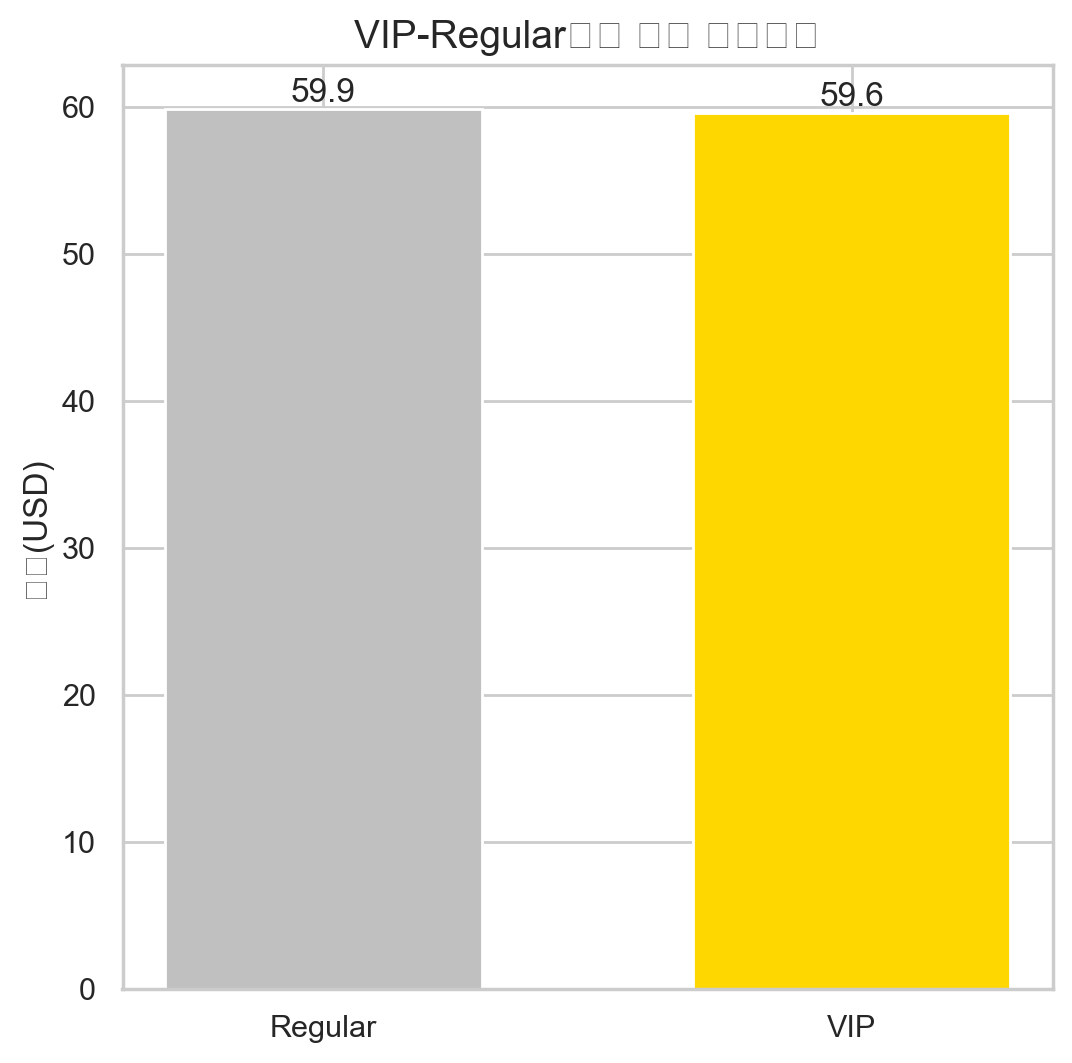

In [61]:
# VIP-Regular고객 평균단가 그래프

plt.figure(figsize=(6,6))
bar= plt.bar(df_by_type2_USD.index, df_by_type2_USD, width=0.6, color=['silver', 'gold'])

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height , ha='center', va='bottom', size = 12)

plt.title('VIP-Regular고객 평균 구매단가', fontsize=14)
plt.xlabel('')
plt.ylabel('달러(USD)')

plt.xticks()
plt.show()

In [62]:
# 거래당 구매단가는 VIP나 Regular고객이나 비슷하다. 그러면 다음으로 보아야 할 것은 연간 구매횟수이다.
# 평균 구매단가 * 연간 구매횟수 = 1년 예상 매출액

In [63]:
# '평균 구매단가 * 연간 구매횟수' 컬럼 만들기
# 평균 구매 단가를 반올림해서 $60이라고 가정하고 각 ID별로 1년 예상 구매금액 컬럼을 생성하자!

# 1년 예상 매출액 컬럼 생성
df["projected_revenue"] = 60 * df['purchases_times_per_annual']
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Payment Method  \
0       Kentucky    L       Gray  Winter  ...           Venmo   
1          Maine    L     Maroon  Winter  ...            Cash   
2  Massachusetts    S     Maroon  Spring  ...     Credit Card   
3   Rhode Island    M     Maroon  Spring  ...          PayPal   
4         Oregon    M  Turquoise  Spring  ...          PayPal   

  Frequency of Purchases gender subscription_status discount_applied  \
0            Fortnightly      0                   1                1   
1            Fortnightly      0                   1                1   
2                 Weekly      0                   1                1   
3                 Weekly      0                   1                1   
4               Annually      0                   1                1   

   frequency_of_purchases purchases_times_per_annual Age2  customer_type2  \
0                       4                         26   50             VIP   
1                       4                         26   10             VIP   
2                       5                         52   50             VIP   
3                       5                         52   20             VIP   
4                       1                          1   40         Regular   

   projected_revenue  
0               1560  
1               1560  
2               3120  
3               3120  
4                 60  

[5 rows x 26 columns]

In [64]:
# VIP-Regular고객 1년 예상 매출액 확인
df_revenue = df.groupby('customer_type2')['projected_revenue'].sum()
df_revenue

customer_type2
Regular     707760
VIP        3380520
Name: projected_revenue, dtype: int64

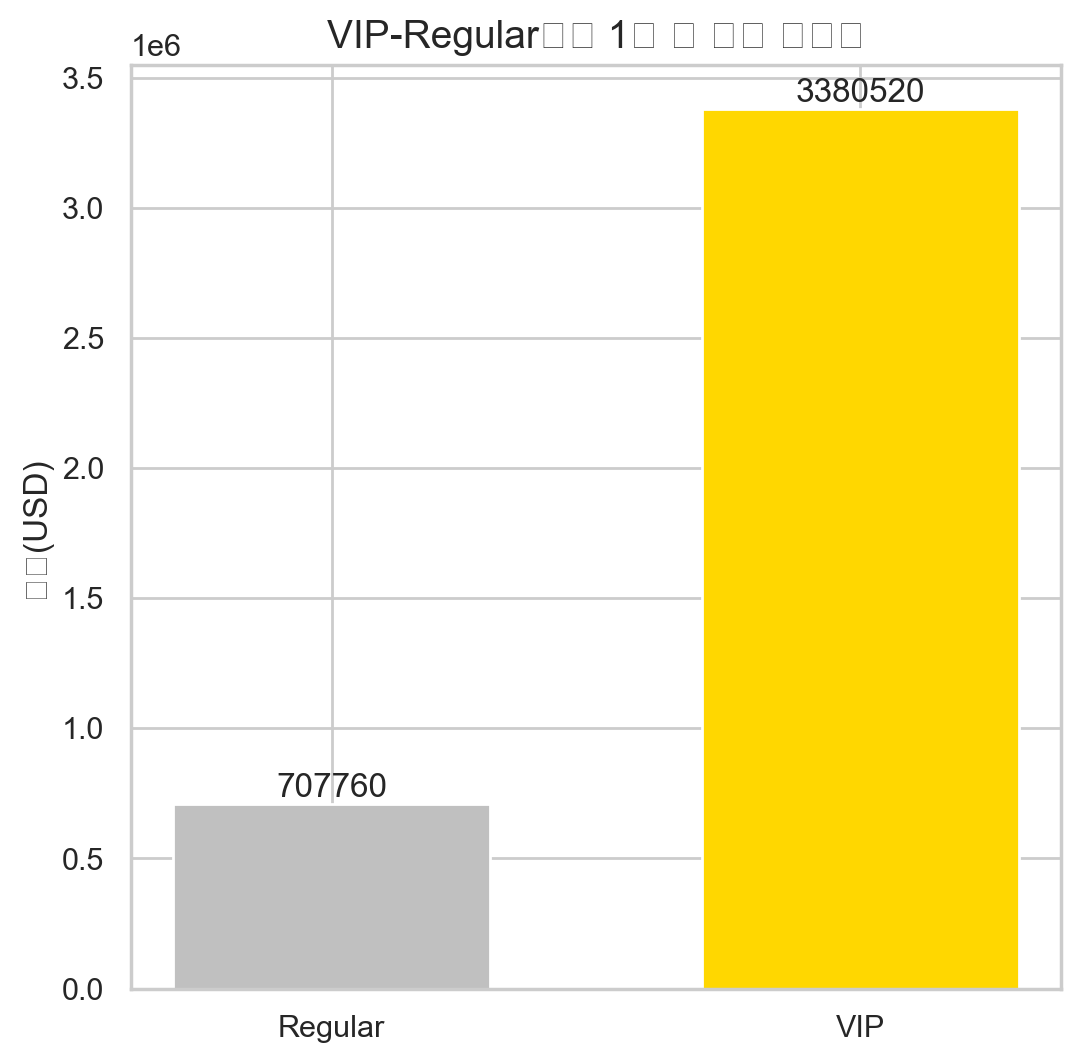

In [65]:
# VIP-Regular고객 1년 예상 매출액 그래프

plt.figure(figsize=(6,6))
bar= plt.bar(df_revenue.index, df_revenue, width=0.6, color=['silver', 'gold'])

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height , ha='center', va='bottom', size = 12)

plt.title('VIP-Regular고객 1년 총 예상 매출액', fontsize=14)
plt.xlabel('')
plt.ylabel('달러(USD)')

plt.xticks()
plt.show()

In [66]:
# VIP-Regular고객 예상매출 비율 확인

df_revenue_prop = df.groupby('customer_type2')['projected_revenue'].sum()/df['projected_revenue'].sum()*100
df_revenue_prop

customer_type2
Regular    17.311926
VIP        82.688074
Name: projected_revenue, dtype: float64

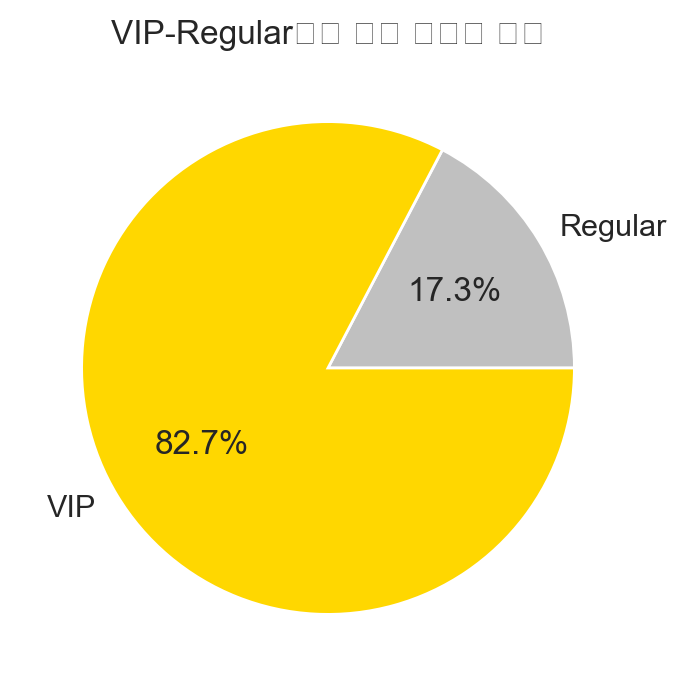

In [67]:
# VIP-Regular고객 예상매출액 비율 그래프

plt.figure(figsize=(6,4))
plt.pie(df_revenue_prop, labels = df_revenue_prop.index, autopct = '%.1f%%', colors=['silver', 'gold'])

plt.title('VIP-Regular고객 예상 매출액 비율')
plt.show()

In [68]:
# VIP-Regular고객 1명당 예상 매출액(1년 기준)
df_revenue_per_member = df.groupby('customer_type2')['projected_revenue'].mean()
df_revenue_per_member

customer_type2
Regular     311.514085
VIP        2076.486486
Name: projected_revenue, dtype: float64

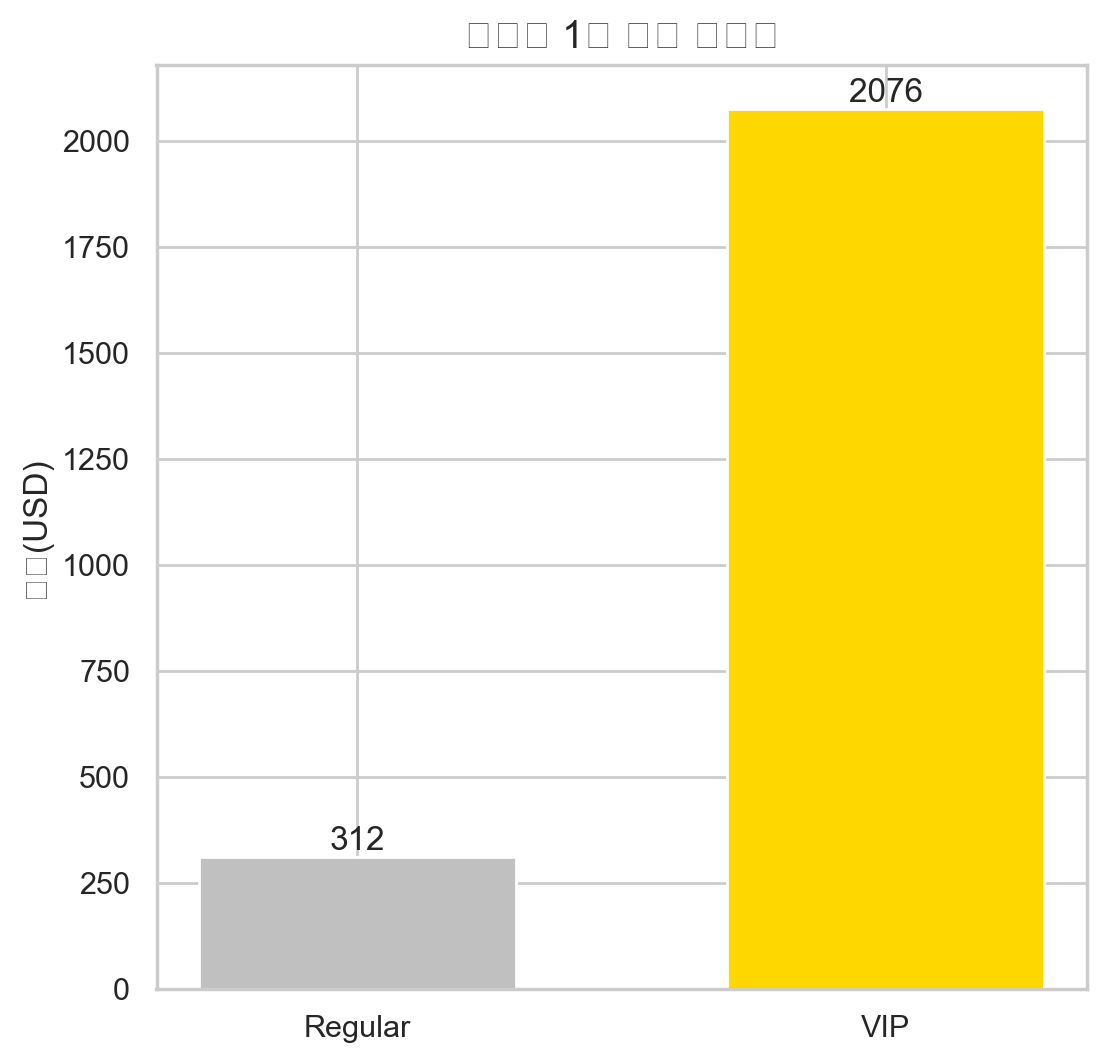

In [69]:
# VIP-Regular고객 1명당 예상 매출액(1년 기준) 그래프

plt.figure(figsize=(6,6))
bar= plt.bar(df_revenue_per_member.index, df_revenue_per_member, width=0.6, color=['silver', 'gold'])

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height , ha='center', va='bottom', size = 12)

plt.title('고객당 1년 예상 매출액', fontsize=14)
plt.xlabel('')
plt.ylabel('달러(USD)')

plt.xticks()
plt.show()

In [70]:
# VIP-Regular 고객 비율 확인
df_by_type2_prop = df.groupby('customer_type2')['Customer ID'].count()/df['Customer ID'].count()*100
df_by_type2_prop

customer_type2
Regular    58.25641
VIP        41.74359
Name: Customer ID, dtype: float64

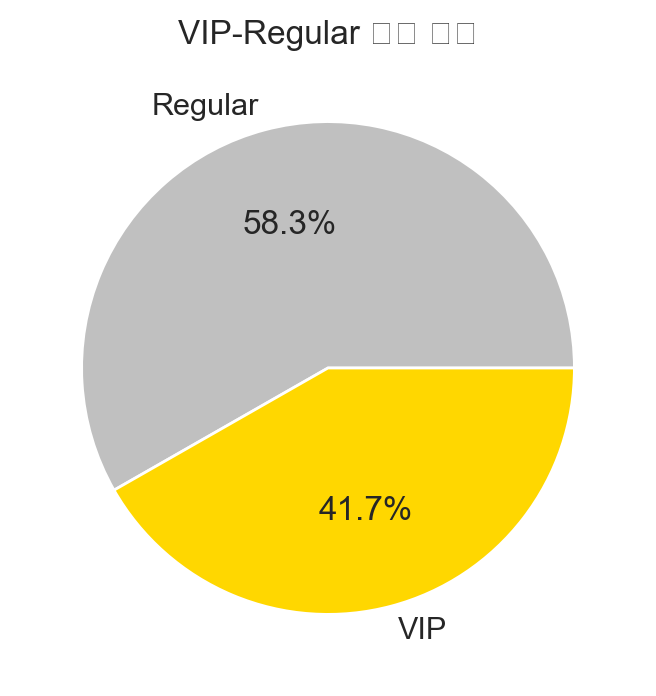

In [71]:
#VIP-Regular고객 비율 그래프

plt.figure(figsize=(6,4))
plt.pie(df_by_type2_prop, labels = df_by_type2_prop.index, autopct = '%.1f%%', colors=['silver', 'gold'])

plt.title('VIP-Regular 고객 비율')
plt.show()

In [72]:
# VIP-Regular 고객 수 확인
df_by_type2 = df.groupby('customer_type2')['Customer ID'].count()
df_by_type2

customer_type2
Regular    2272
VIP        1628
Name: Customer ID, dtype: int64

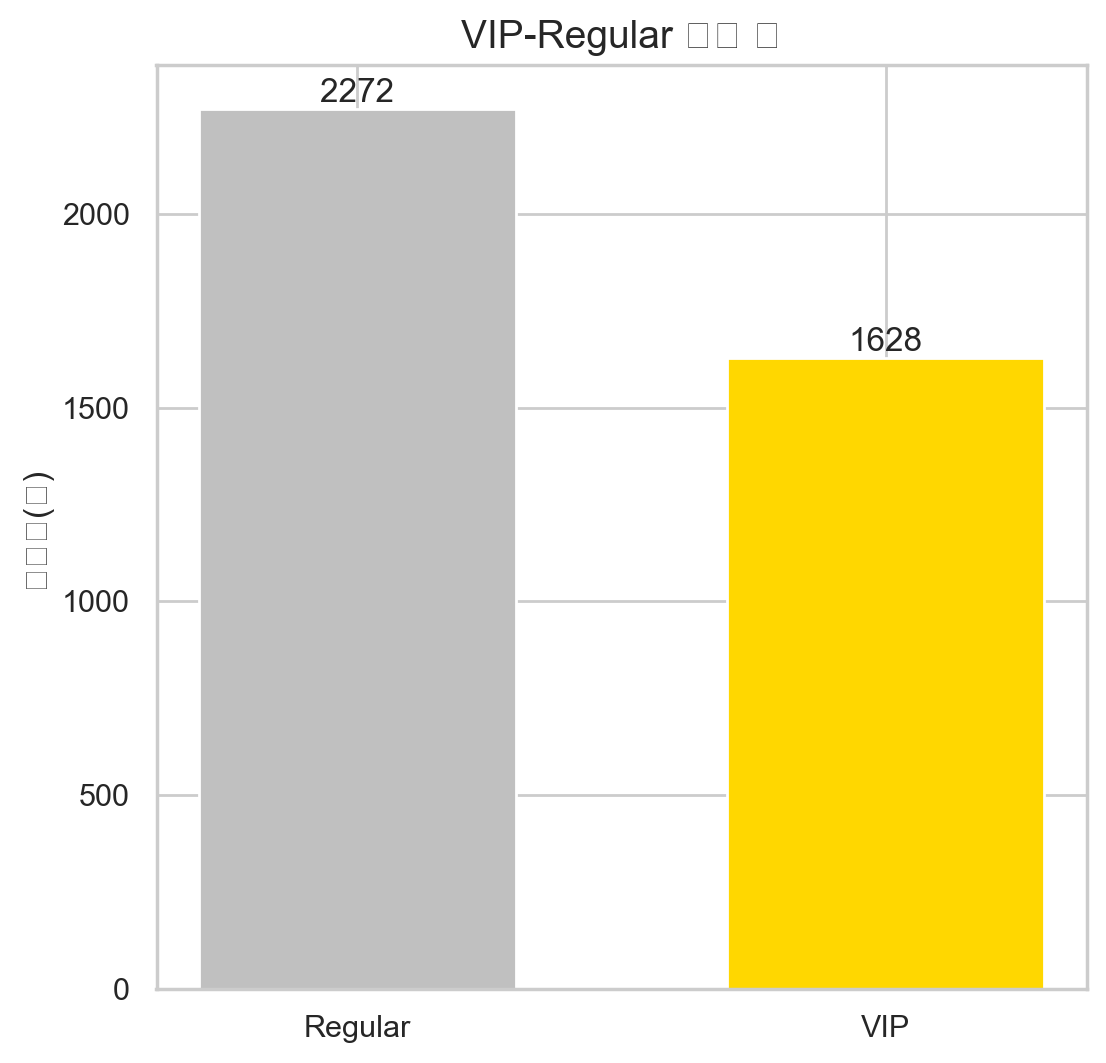

In [73]:
# VIP-Regular 고객 수 그래프

plt.figure(figsize=(6,6))
bar= plt.bar(df_by_type2.index, df_by_type2, width=0.6, color=['silver', 'gold'])

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height , ha='center', va='bottom', size = 12)

plt.title('VIP-Regular 고객 수', fontsize=14)
plt.xlabel('')
plt.ylabel('고객수(명)')

plt.xticks()
plt.show()

In [74]:
# VIP가 매출의 많은 부분을 차지하고 있으므로 VIP대상으로 프로모션을 진행하는 것이 타당해 보인다.
# VIP의 연령대와 아이템 추출하자

In [75]:
# VIP 데이터만 추출
# 이미 만들어 놓은 df가 있음 : df_by_VIP = df[df['customer_type2']=='VIP']
df_by_VIP.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
5            6   46   Male       Sneakers  Footwear                     20   

        Location Size   Color  Season  ...  Previous Purchases Payment Method  \
0       Kentucky    L    Gray  Winter  ...                  14          Venmo   
1          Maine    L  Maroon  Winter  ...                   2           Cash   
2  Massachusetts    S  Maroon  Spring  ...                  23    Credit Card   
3   Rhode Island    M  Maroon  Spring  ...                  49         PayPal   
5        Wyoming    M   White  Summer  ...                  14          Venmo   

  Frequency of Purchases gender subscription_status  discount_applied  \
0            Fortnightly      0                   1                 1   
1            Fortnightly      0                   1                 1   
2                 Weekly      0                   1                 1   
3                 Weekly      0                   1                 1   
5                 Weekly      0                   1                 1   

  frequency_of_purchases purchases_times_per_annual  Age2  customer_type2  
0                      4                         26    50             VIP  
1                      4                         26    10             VIP  
2                      5                         52    50             VIP  
3                      5                         52    20             VIP  
5                      5                         52    40             VIP  

[5 rows x 25 columns]

In [76]:
# VIP고객 연령대 확인
df_by_VIP_age2 = df_by_VIP.groupby('Age2')['Customer ID'].count().sort_index()
df_by_VIP_age2

Age2
10     64
20    312
30    295
40    313
50    333
60    286
70     25
Name: Customer ID, dtype: int64

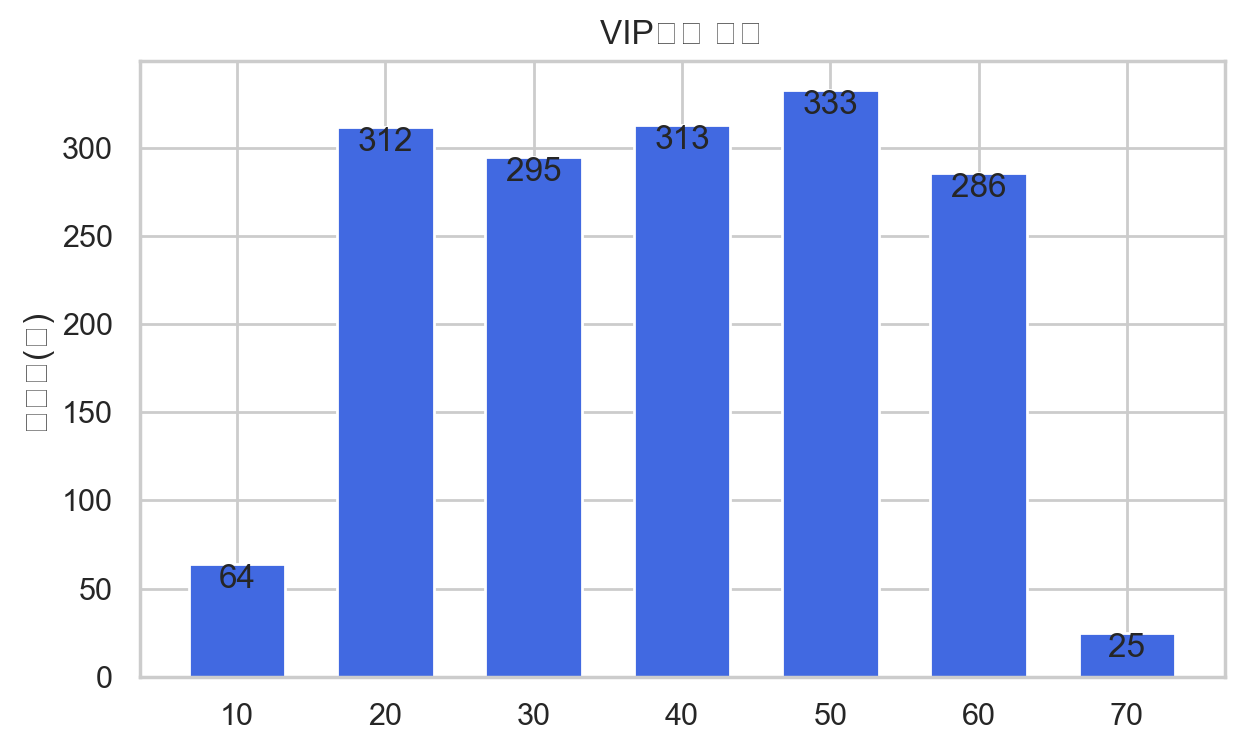

In [77]:
# VIP고객 연령대 그래프
plt.figure(figsize=(7,4))
bar = plt.bar(df_by_VIP_age2.index, df_by_VIP_age2, width=6.5, color='royalblue')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height , ha='center', va='top', size = 12)

plt.title('VIP고객 연령')
plt.xlabel('')
plt.ylabel('고객수(명)')

plt.xticks(rotation=0)
plt.show()

In [78]:
# 봄시즌 남성 VIP 데이터만 추출

df_by_spring_VIP_men = df[(df['Season']=='Spring') & (df['customer_type2']=='VIP') & (df['Gender']=='Male')]
df_by_spring_VIP_men.head()

Customer ID  Age Gender Item Purchased     Category  \
2             3   50   Male          Jeans     Clothing   
3             4   21   Male        Sandals     Footwear   
13           14   65   Male          Dress     Clothing   
16           17   25   Male     Sunglasses  Accessories   
49           50   68   Male         Hoodie     Clothing   

    Purchase Amount (USD)       Location Size   Color  Season  ...  \
2                      73  Massachusetts    S  Maroon  Spring  ...   
3                      90   Rhode Island    M  Maroon  Spring  ...   
13                     51  New Hampshire    M  Violet  Spring  ...   
16                     36        Alabama    S    Gray  Spring  ...   
49                     30     New Jersey    S  Indigo  Spring  ...   

    Payment Method Frequency of Purchases gender subscription_status  \
2      Credit Card                 Weekly      0                   1   
3           PayPal                 Weekly      0                   1   
13          PayPal                 Weekly      0                   1   
16      Debit Card              Bi-Weekly      0                   1   
49      Debit Card              Bi-Weekly      0                   1   

   discount_applied  frequency_of_purchases purchases_times_per_annual Age2  \
2                 1                       5                         52   50   
3                 1                       5                         52   20   
13                1                       5                         52   60   
16                1                       4                         26   20   
49                1                       4                         26   60   

    customer_type2  projected_revenue  
2              VIP               3120  
3              VIP               3120  
13             VIP               3120  
16             VIP               1560  
49             VIP               1560  

[5 rows x 26 columns]

In [79]:
# 봄시즌 남성 VIP고객 구입 아이템 확인
df_by_spring_VIP_men_item = df_by_spring_VIP_men.groupby('Item Purchased')['Customer ID'].count().sort_values(ascending=False).head(8)
df_by_spring_VIP_men_item

Item Purchased
Gloves      16
Shorts      16
Sweater     16
Backpack    14
Belt        14
Sneakers    14
Skirt       14
T-shirt     14
Name: Customer ID, dtype: int64

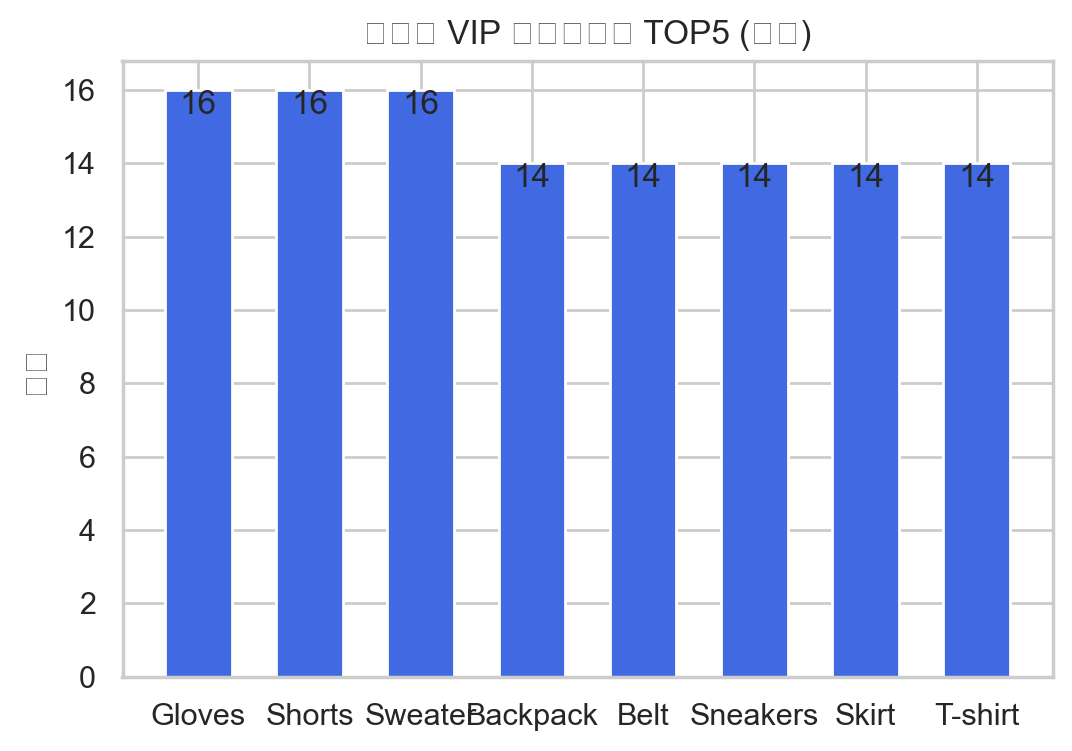

In [80]:
# 봄시즌 남성 VIP 구입 아이템 수 그래프

plt.figure(figsize=(6,4))
bar = plt.bar(df_by_spring_VIP_men_item.index, df_by_spring_VIP_men_item, width=0.6, color='royalblue')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height , ha='center', va='top', size = 12)

plt.title('봄시즌 VIP 구입아이템 TOP5 (남성)')
plt.xlabel('')
plt.ylabel('개수')

plt.xticks(rotation=0)
plt.show()

In [81]:
# 봄시즌 여성 VIP고객  데이터만 추출
df_by_spring_VIP_women = df[(df['Season']=='Spring') & (df['customer_type2']=='VIP') & (df['Gender']=='Female')]
df_by_spring_VIP_women.head()

Customer ID  Age  Gender Item Purchased     Category  \
2669         2670   39  Female           Belt  Accessories   
2676         2677   43  Female       Backpack  Accessories   
2678         2679   33  Female           Belt  Accessories   
2704         2705   52  Female          Dress     Clothing   
2705         2706   65  Female         Jacket    Outerwear   

      Purchase Amount (USD)    Location Size      Color  Season  ...  \
2669                     28    Illinois    L       Teal  Spring  ...   
2676                     77    Kentucky    M     Maroon  Spring  ...   
2678                     91     Montana    M    Magenta  Spring  ...   
2704                     54   Tennessee    L      Beige  Spring  ...   
2705                     81  Washington    S  Turquoise  Spring  ...   

      Payment Method Frequency of Purchases gender subscription_status  \
2669     Credit Card                 Weekly      1                   0   
2676            Cash            Fortnightly      1                   0   
2678     Credit Card              Bi-Weekly      1                   0   
2704      Debit Card                 Weekly      1                   0   
2705     Credit Card              Bi-Weekly      1                   0   

     discount_applied  frequency_of_purchases purchases_times_per_annual Age2  \
2669                0                       5                         52   30   
2676                0                       4                         26   40   
2678                0                       4                         26   30   
2704                0                       5                         52   50   
2705                0                       4                         26   60   

      customer_type2  projected_revenue  
2669             VIP               3120  
2676             VIP               1560  
2678             VIP               1560  
2704             VIP               3120  
2705             VIP               1560  

[5 rows x 26 columns]

In [82]:
# 봄시즌 여성 VIP고객 구입 아이템 확인
df_by_spring_VIP_women_item = df_by_spring_VIP_women.groupby('Item Purchased')['Customer ID'].count().sort_values(ascending=False).head(6)
df_by_spring_VIP_women_item

Item Purchased
Boots      11
Coat        8
Blouse      8
Handbag     8
Sweater     8
Skirt       8
Name: Customer ID, dtype: int64

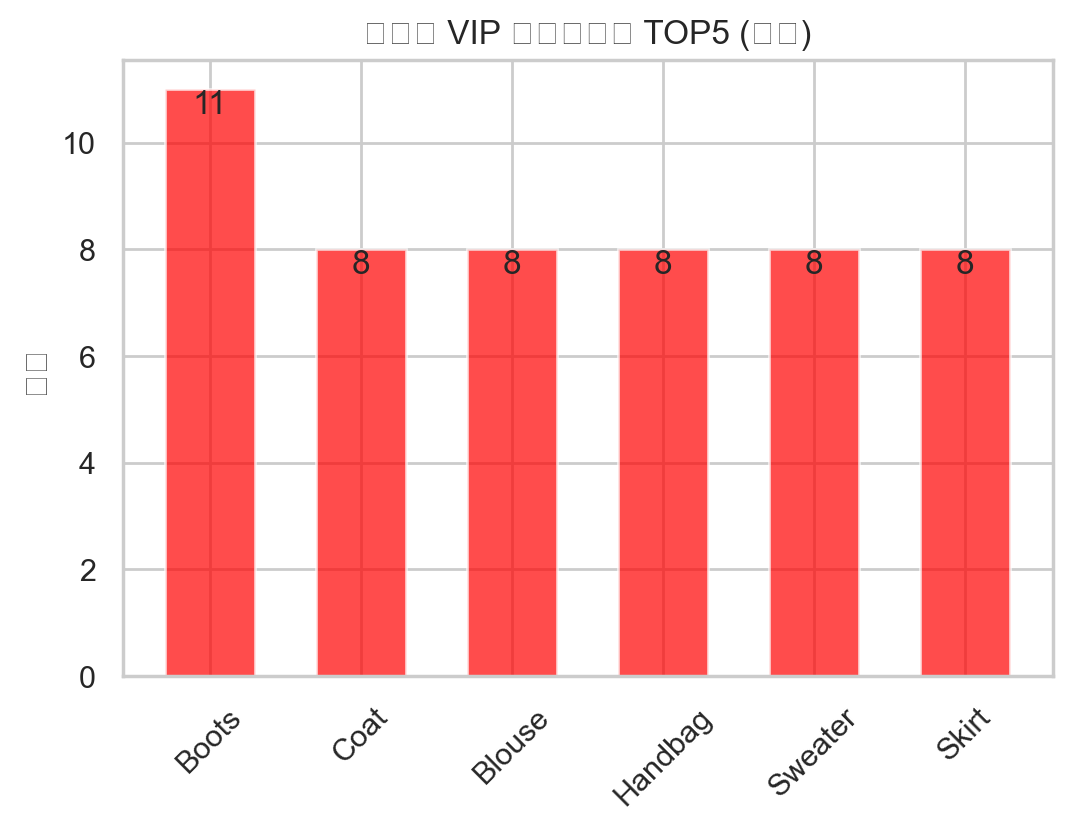

In [83]:
# 봄시즌 여성 VIP고객 구입 아이템 수 그래프

plt.figure(figsize=(6,4))
bar = plt.bar(df_by_spring_VIP_women_item.index, df_by_spring_VIP_women_item, width=0.6, color='red', alpha=0.7)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height , ha='center', va='top', size = 12)

plt.title('봄시즌 VIP 구입아이템 TOP5 (여성)')
plt.xlabel('')
plt.ylabel('개수')

plt.xticks(rotation=45)
plt.show()

In [84]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'gender',
       'subscription_status', 'discount_applied', 'frequency_of_purchases',
       'purchases_times_per_annual', 'Age2', 'customer_type2',
       'projected_revenue'],
      dtype='object')

In [85]:
df.iloc[0]

Customer ID                             1
Age                                    55
Gender                               Male
Item Purchased                     Blouse
Category                         Clothing
Purchase Amount (USD)                  53
Location                         Kentucky
Size                                    L
Color                                Gray
Season                             Winter
Review Rating                         3.1
Subscription Status                   Yes
Shipping Type                     Express
Discount Applied                      Yes
Promo Code Used                       Yes
Previous Purchases                     14
Payment Method                      Venmo
Frequency of Purchases        Fortnightly
gender                                  0
subscription_status                     1
discount_applied                        1
frequency_of_purchases                  4
purchases_times_per_annual             26
Age2                              

In [86]:
# 클러스터링 시도

In [87]:
from sklearn.cluster import KMeans

In [88]:
# K-Means 모델 생성 및 학습
kmeans = KMeans(n_clusters=2)

In [89]:
clustering_df = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'gender', 'subscription_status'\
                   , 'discount_applied', 'frequency_of_purchases']]

In [90]:
kmeans.fit(clustering_df)

KMeans(n_clusters=2)

In [91]:
# 클러스터 예측
labels = kmeans.predict(clustering_df)

In [92]:
labels

array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

In [93]:
df['rabel'] = labels

In [94]:
df

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2                        73  Massachusetts    S     Maroon  Spring  ...   
3                        90   Rhode Island    M     Maroon  Spring  ...   
4                        49         Oregon    M  Turquoise  Spring  ...   
...                     ...            ...  ...        ...     ...  ...   
3895                     28       Virginia    L  Turquoise  Summer  ...   
3896                     49           Iowa    L      White  Spring  ...   
3897                     33     New Jersey    L      Green  Spring  ...   
3898                     77      Minnesota    S      Brown  Summer  ...   
3899                     81     California    M      Beige  Spring  ...   

      Frequency of Purchases gender subscription_status discount_applied  \
0                Fortnightly      0                   1                1   
1                Fortnightly      0                   1                1   
2                     Weekly      0                   1                1   
3                     Weekly      0                   1                1   
4                   Annually      0                   1                1   
...                      ...    ...                 ...              ...   
3895                  Weekly      1                   0                0   
3896               Bi-Weekly      1                   0                0   
3897               Quarterly      1                   0                0   
3898                  Weekly      1                   0                0   
3899               Quarterly      1                   0                0   

     frequency_of_purchases  purchases_times_per_annual Age2 customer_type2  \
0                         4                          26   50            VIP   
1                         4                          26   10            VIP   
2                         5                          52   50            VIP   
3                         5                          52   20            VIP   
4                         1                           1   40        Regular   
...                     ...                         ...  ...            ...   
3895                      5                          52   40            VIP   
3896                      4                          26   50            VIP   
3897                      2                           4   40        Regular   
3898                      5                          52   40            VIP   
3899                      2                           4   50        Regular   

      projected_revenue  rabel  
0                  1560      1  
1                  1560      0  
2                  3120      0  
3                  3120      0  
4                    60      1  
...                 ...    ...  
3895               3120      1  
3896               1560      1  
3897                240      1  
3898               3120      0  
3899                240      0  

[3900 rows x 27 columns]

In [95]:
df[['customer_type2', 'rabel']]

customer_type2  rabel
0               VIP      1
1               VIP      0
2               VIP      0
3               VIP      0
4           Regular      1
...             ...    ...
3895            VIP      1
3896            VIP      1
3897        Regular      1
3898            VIP      0
3899        Regular      0

[3900 rows x 2 columns]

In [96]:
df[['customer_type2', 'rabel']].head(50)

customer_type2  rabel
0             VIP      1
1             VIP      0
2             VIP      0
3             VIP      0
4         Regular      1
5             VIP      1
6         Regular      0
7             VIP      1
8         Regular      0
9         Regular      1
10            VIP      1
11            VIP      0
12            VIP      0
13            VIP      1
14            VIP      1
15        Regular      0
16            VIP      1
17        Regular      1
18            VIP      1
19            VIP      0
20        Regular      1
21        Regular      0
22        Regular      1
23            VIP      0
24            VIP      1
25        Regular      1
26        Regular      1
27        Regular      1
28        Regular      0
29            VIP      1
30        Regular      1
31        Regular      0
32        Regular      0
33        Regular      1
34        Regular      0
35            VIP      1
36            VIP      0
37            VIP      1
38        Regular      1
39        Regular      1
40        Regular      0
41        Regular      1
42        Regular      0
43            VIP      0
44            VIP      1
45        Regular      1
46        Regular      1
47            VIP      1
48        Regular      1
49            VIP      1

In [97]:
df['rabel'].value_counts()

rabel
1    1956
0    1944
Name: count, dtype: int64

In [101]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [102]:
silhouette_score(clustering_df, labels)

0.3578232269975232

In [103]:
from kmeans_visual import visualize_silhouette

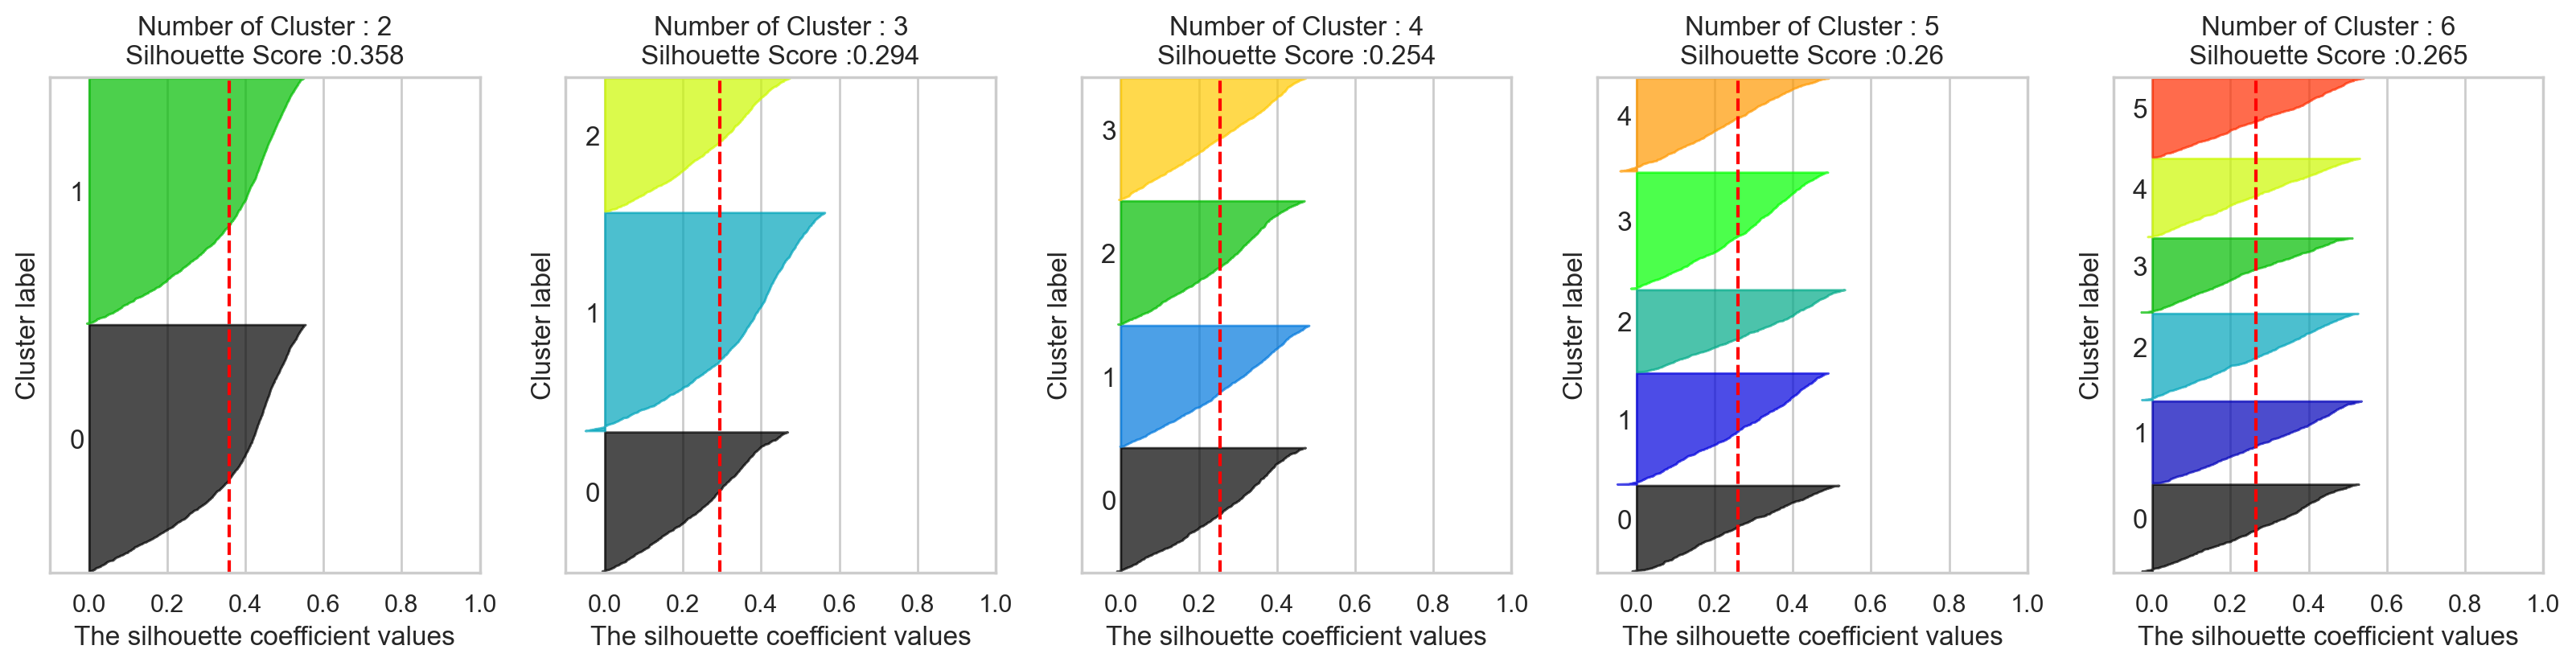

In [104]:
visualize_silhouette([2, 3, 4, 5, 6], clustering_df)